# <font color='#731448'>**MD004 - Entropia**</font>

Se dispone del siguiente dataset que contiene características de dos tipos de calabazas. El objetivo será elaborar un modelo de regresión logística que nos permita realizar una predicción sobre si la calabaza es del tipo Urgup_Sivrisi (0) o del tipo Cercevelik (1)

1. Visualización, limpieza y comprensión del dataset (1p): realizar un estudio previo al tratamiento de los datos para comprender mejor la información de la que se dispone
2. Elección de variables:
- Análisis de la información mutua (2p)
- Estudio de la correlación entre las variables (1p)
- Estudio de las componentes principales: no olvidéis las visualizaciones en este apartado (2p)
3. Desarrollo de un modelo de Regresión logística (3p): justificad la elección de variables finales y valoración del modelo en función de la matriz de confusión

#### <font color='#731448'>**Dataset de Semillas de Calabazas**</font>

In [40]:
library(tidyverse)
library(FSelectorRcpp)
library(caret)
library(ggplot2)
library(GGally)
library(gridExtra)
library(dplyr)

In [2]:
data = read.csv(file='20240123_Semillas_calabaza.csv', header=TRUE, sep=',', dec='.', fileEncoding = 'UTF-8')
str(data)

'data.frame':	2500 obs. of  14 variables:
 $ X                : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Area             : int  56276 76631 71623 66458 66107 73191 73338 69692 95727 73465 ...
 $ Perimeter        : num  888 1068 1083 992 998 ...
 $ Major_Axis_Length: num  326 417 436 382 384 ...
 $ Minor_Axis_Length: num  220 234 211 223 220 ...
 $ Convex_Area      : int  56831 77280 72663 67118 67117 73969 73859 70442 96831 74089 ...
 $ Equiv_Diameter   : num  268 312 302 291 290 ...
 $ Eccentricity     : num  0.738 0.828 0.875 0.812 0.819 ...
 $ Solidity         : num  0.99 0.992 0.986 0.99 0.985 ...
 $ Extent           : num  0.745 0.715 0.74 0.74 0.675 ...
 $ Roundness        : num  0.896 0.844 0.767 0.849 0.834 ...
 $ Aspect_Ration    : num  1.48 1.78 2.07 1.71 1.74 ...
 $ Compactness      : num  0.821 0.749 0.693 0.762 0.756 ...
 $ Class            : chr  "Çerçevelik" "Çerçevelik" "Çerçevelik" "Çerçevelik" ...


In [3]:
# Eliminamos la variable X
data$X <- NULL
head(data)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
2,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
3,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
4,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
5,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik
6,73191,1041.460,405.8132,231.4261,73969,305.2698,0.8215,0.9895,0.7165,0.8480,1.7535,0.7522,Çerçevelik


Descripcion de las variables de nuestro data set:
- <font color='#731448'>**Area:**</font> área de la calabaza
- <font color='#731448'>**Perimeter:**</font> perímetro de la calabaza
- <font color='#731448'>**Major_Axis_Length:**</font> Longitud del eje más largo de la calabaza
- <font color='#731448'>**Minor_Axis_Length:**</font> Longitud del eje más corto de la calabaza
- <font color='#731448'>**Convex_Area:**</font> Área convexa de la calabaza
- <font color='#731448'>**Equiv_Diameter:**</font> Diámetro equivalente
- <font color='#731448'>**Eccentricity:**</font> Excentricidad de la calabaza
- <font color='#731448'>**Solidity:**</font> Solidez de la calabaza
- <font color='#731448'>**Extent:**</font> Alcance de la calabaza
- <font color='#731448'>**Roundness:**</font> Redondez de la calabaza
- <font color='#731448'>**Aspect_Ratio:**</font> Relación de aspecto de la calabaza
- <font color='#731448'>**Compactness:**</font> Compactibilidad de la calabaza
- <font color='#731448'>**Class:**</font> Clase dela calabaza


####
Tenmos un data set con 13 variables, de las cuales, 12 son numericas y una es categorica. Nuestro objetivo en este practico es poder predecir a traves de una regresion logistica la probabilidad de que una semilla sea de una clase o de otra. Pasemos a realizar un analisis estadistico y grafico para comprender nuestro dominio.

### <font color='#731448'>**1. Analisis de dominio**</font>

Antes de adentrarnos en la descripcion estadistica de nuestras variables, tenemos que entender bien de que va nuestro objetivo. Queremos desarrollar un modelo que nos prediga de manera robusta la clase de semilla de la calabaza. Para ello vamos a realizar una regresion logistica en base a nuestro data set llamado "data". Como bien explicamos anteriormente, este data set cuenta con 12 variables independientes que podriamos utilizar para generar este modelo. Cada variable podra aportar mas o menos informacion sobre nuestro objetivo final, y esto lo vamos a determinar luego de hacer todo el desgloce de nuestra base de datos. Sin embargo, previamente debemos comentar ciertas advertencias. Lo primero que debemos hacer es ver la calidad de registros que tenemos, es decir, ver si hay observaciones que tienen nulos en variables. Una vez identificado esto, evaluaremos su magnitud sobre el data set total para decidir si procedemos a quitarnos estas observaciones o a estimarlas con algun metodo. Lo segundo que debemos hacer es observar cual es la distribucion de nuestra variable clase, idealmente querremos que esta este balanceada en partes iguales, para poder minimizar los errores tipo I y tipo II. Como esto no sucede siempre, debemos identificar cual es la carga de cada clase sobre el data set general, y dependiendo de ello deberemos tomar ciertas decisiones. Lo segundo que debemos remarcar es la separabilidad que observamos dentro de nuestras variables independientes evaluadas para cada clase. Idealmente buscariamos la mayor separabilidad posible en cada una de ellas, ya que esto nos permitiria predecir con mayor precision. Sin embargo, esto no siempre pasa, con lo cual deberemos evaluar como se dan estas distribuciones.

Una vez aclarado esto, pasaremos a hacer el analisis estadistico y grafico de nuestro data set:

#### <font color='#731448'>**Evaluacion de nulos**</font>

In [4]:
# Verificar completitud de observaciones (sin nulos)
observaciones_completas <- complete.cases(data)

# Obtener el índice de observaciones con nulos
observaciones_con_nulos <- which(!observaciones_completas)

# Mostrar las observaciones con nulos
data_con_nulos <- data[observaciones_con_nulos, ]

# Mostrar las variables con sus valores nulos
nulos_por_variable <- sapply(data_con_nulos, function(x) sum(is.na(x)))

# Mostrar el resultado
print(nulos_por_variable)

             Area         Perimeter Major_Axis_Length Minor_Axis_Length 
                0                 0                 0                 0 
      Convex_Area    Equiv_Diameter      Eccentricity          Solidity 
                0                 0                 0                 0 
           Extent         Roundness     Aspect_Ration       Compactness 
                0                 0                 0                 0 
            Class 
                0 


Como vemos, no hay nulos en nuestras variables.

#### <font color='#731448'>**Analisis de asimetria y variabilidad**</font>

In [5]:
sub_set = data %>%
  select_if(is.numeric)

In [6]:
summary(sub_set)

      Area          Perimeter      Major_Axis_Length Minor_Axis_Length
 Min.   : 47939   Min.   : 868.5   Min.   :320.8     Min.   :152.2    
 1st Qu.: 70765   1st Qu.:1048.8   1st Qu.:415.0     1st Qu.:211.2    
 Median : 79076   Median :1123.7   Median :449.5     Median :224.7    
 Mean   : 80658   Mean   :1130.3   Mean   :456.6     Mean   :225.8    
 3rd Qu.: 89758   3rd Qu.:1203.3   3rd Qu.:492.7     3rd Qu.:240.7    
 Max.   :136574   Max.   :1559.5   Max.   :661.9     Max.   :305.8    
  Convex_Area     Equiv_Diameter   Eccentricity       Solidity     
 Min.   : 48366   Min.   :247.1   Min.   :0.4921   Min.   :0.9186  
 1st Qu.: 71512   1st Qu.:300.2   1st Qu.:0.8317   1st Qu.:0.9883  
 Median : 79872   Median :317.3   Median :0.8637   Median :0.9903  
 Mean   : 81508   Mean   :319.3   Mean   :0.8609   Mean   :0.9895  
 3rd Qu.: 90798   3rd Qu.:338.1   3rd Qu.:0.8970   3rd Qu.:0.9915  
 Max.   :138384   Max.   :417.0   Max.   :0.9481   Max.   :0.9944  
     Extent         Roundne

Hagamos un breve analisis de cada una de nuestras variables numericas independientes:

<font color='#731448'>**Area**</font>
La media (80,6) y la mediana (79,0) son cercanas, indicando una distribución simétrica

<font color='#731448'>**Perimeter**</font>
La media (1130,3) y la mediana (1123,7) son cercanas, indicando una distribución simétrica.

<font color='#731448'>**Major_Axis_Length**</font>
La media (456,6) y la mediana (449,5) son cercanas, indicando una distribución simétrica.

<font color='#731448'>**Minor_Axis_Length**</font>
La media (225,8) y la mediana (224,7) son cercanas, indicando una distribución simétrica.

<font color='#731448'>**Convex_Area**</font>
La media (81,5) y la mediana (79,8) son cercanas, indicando una distribución simétrica.

<font color='#731448'>**Equiv_Diameter**</font>
La media (319,3) y la mediana (317,3) son cercanas, indicando una distribución simétrica.

<font color='#731448'>**Eccentricity**</font>
La media (0,8609) y la mediana (0,8637) son casi exactas, indicando una distribución totalmente simétrica.

<font color='#731448'>**Solidity**</font>
La media (0.9895) y la mediana (0.9903) son casi exactas, indicando una distribución totalmente simétrica.

<font color='#731448'>**Extent**</font>
La media (0.6932) y la mediana (0.7130) son cercanas, indicando una distribución simétrica.

<font color='#731448'>**Roundness**</font>
La media (0.7915) y la mediana (0.7977) son casi exactas, indicando una distribución totalmente simétrica.

<font color='#731448'>**Aspect_Ration**</font>
La media (2042) y la mediana (1984) son cercanas, indicando una distribución simétrica.

<font color='#731448'>**Compactness**</font>
La media (0,7041) y la mediana (0,7077) son casi exactas, indicando una distribución totalmente simétrica.

A primera vista, todas las distribuciones parecen ser normales y simetricas. Debemos revisar la variabilidad de cada una para entender como es la dispersion de datos de cada variable: Veamos estas distribuciones de manera grafica para comprender lo descrito previamente:


Warning message:
"`aes_string()` was deprecated in ggplot2 3.0.0.
i Please use tidy evaluation idioms with `aes()`.
i See also `vignette("ggplot2-in-packages")` for more information."


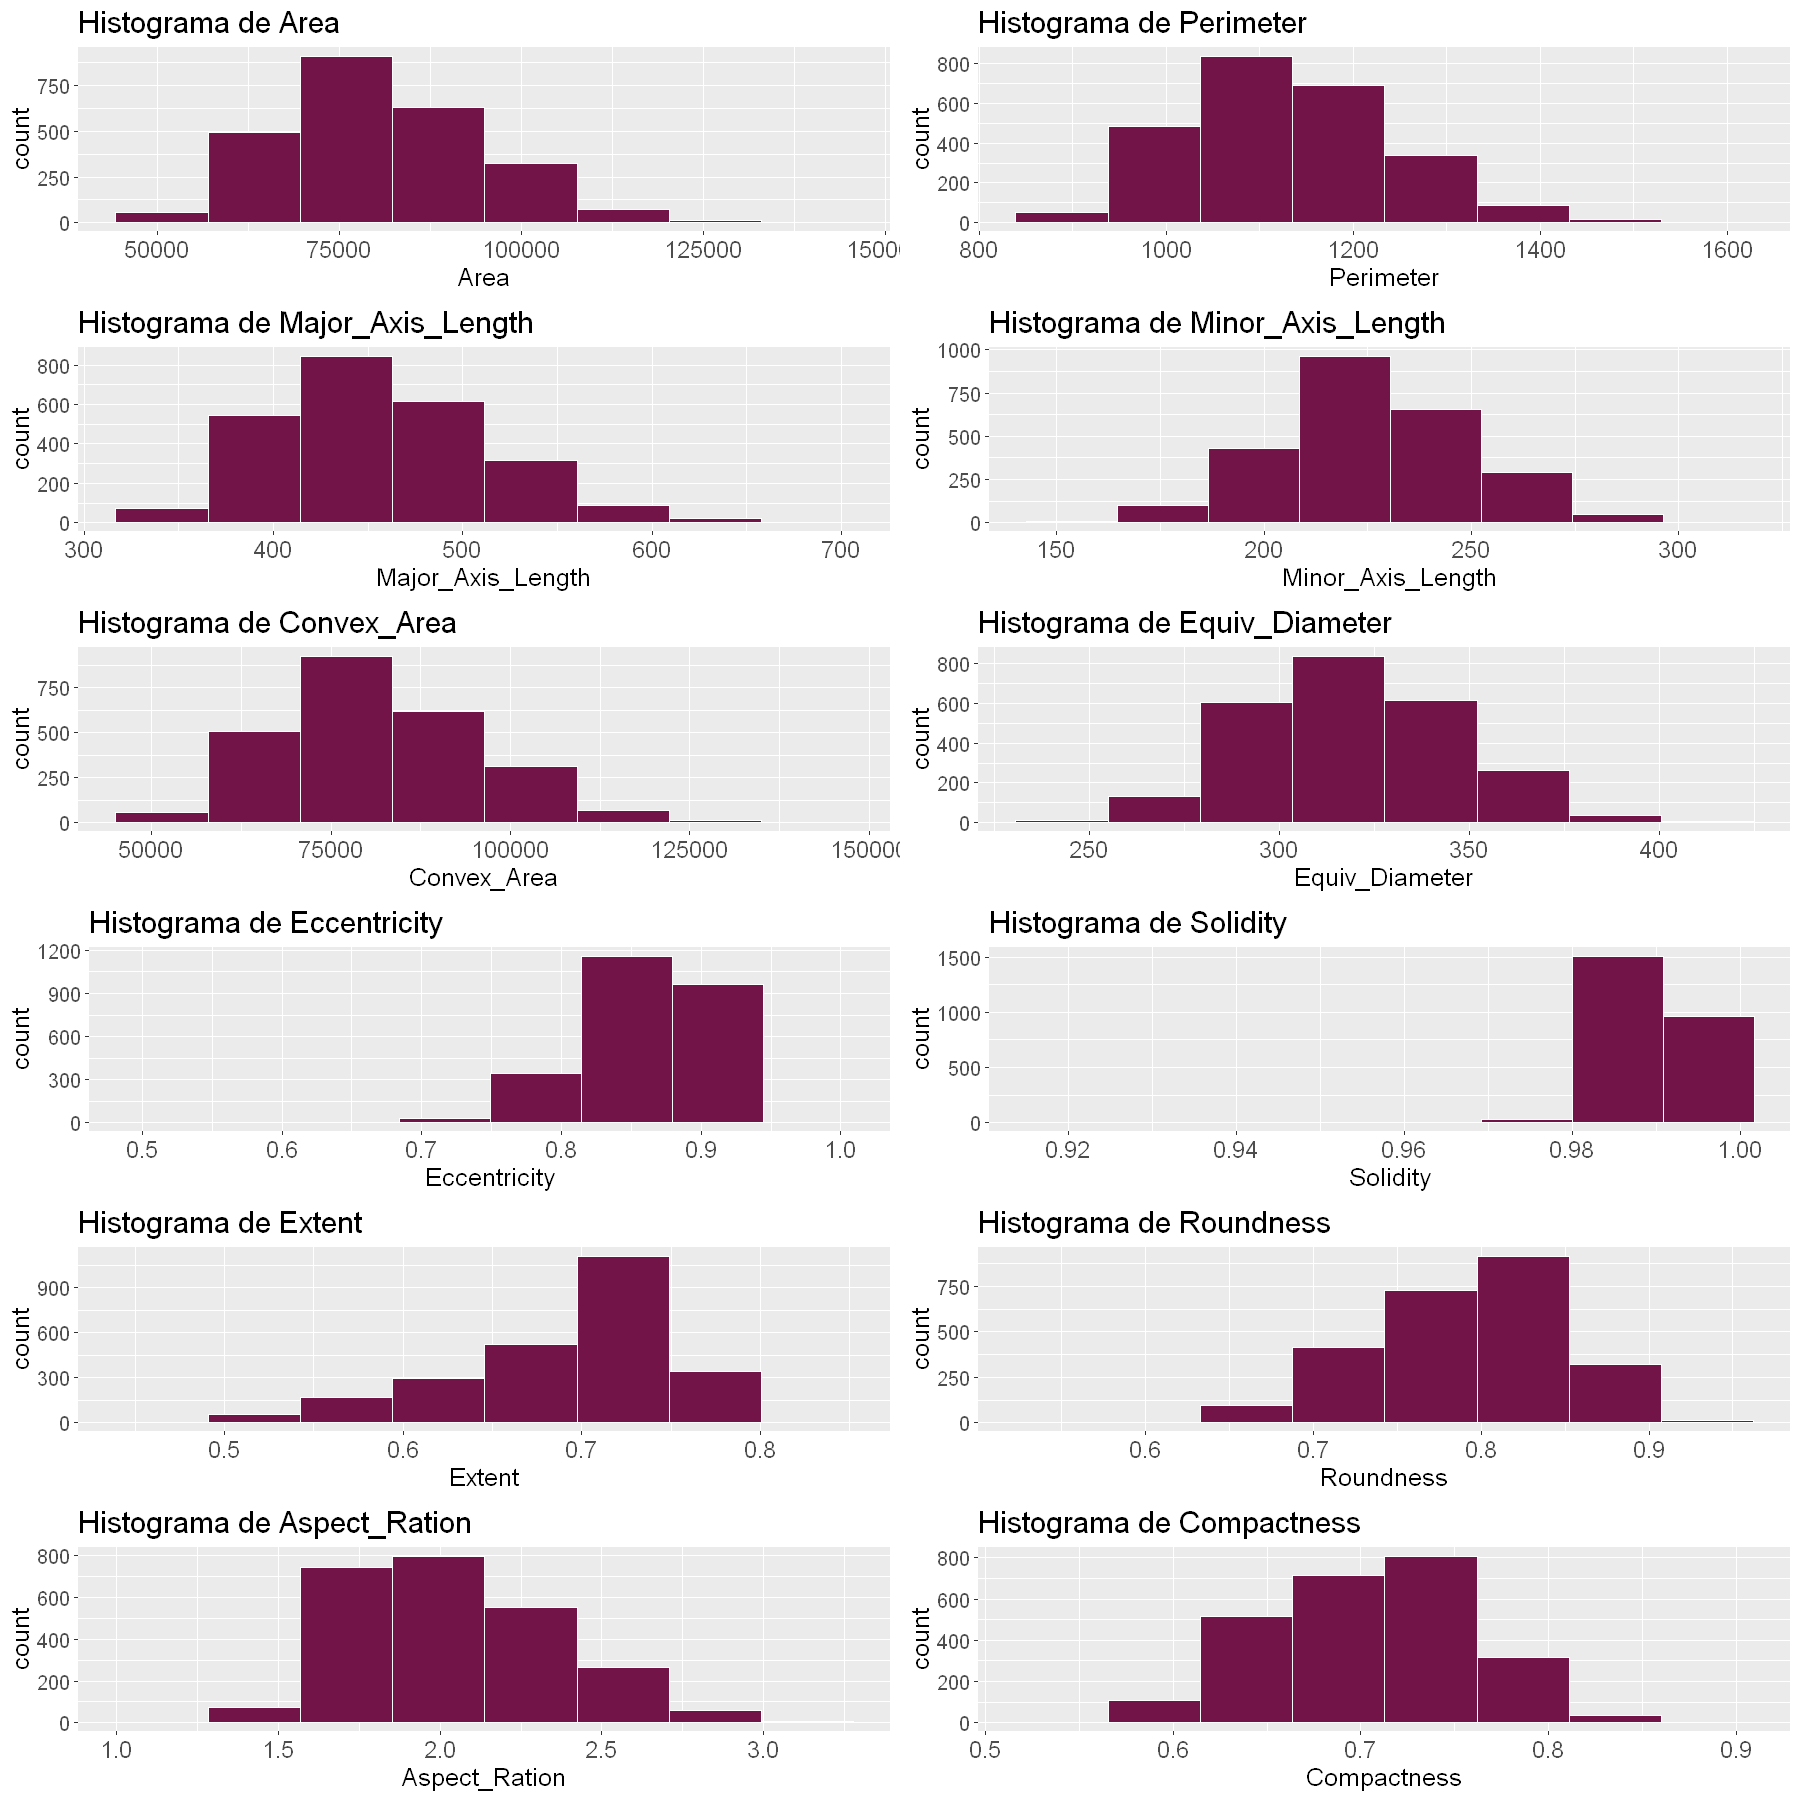

In [7]:
graficos_histograma <- list()
graficos_boxplot <- list()

# Obtener todas las variables de data
variables <- colnames(sub_set)

options(
  repr.plot.width = 13,  
  repr.plot.height = 8 
)

# Histogramas
for (variable in variables) {
  grafico <- ggplot(data) +
    aes_string(x = variable) +
    geom_histogram(bins = 8, fill = '#731448', color = 'white', na.rm = TRUE) +
    theme(text = element_text(size = 15), axis.text.x = element_text(size = 14)) + 
    labs(title = paste("Histograma de", variable))
  
  graficos_histograma[[length(graficos_histograma) + 1]] <- grafico
}

options(
  repr.plot.width = 15,  
  repr.plot.height = 15  
)

# Mostrar los histogramas en un grid
grid.arrange(grobs = graficos_histograma, ncol = 2)

Habiamos observado que todas las distribuciones tenian medias y medianas similares, y lo podemos comprobar con las visualizaciones graficas de cada histograma. Sin embargo, nos habia quedado por mencionar algo respecto a la variabilidad de cada una. La variabilidad nos ayudan a determinar el grado de concentracion de cada distribucion. Si bien todas aparentan ser simetricas, tenemos variables que poseen una concentracion mayor que otras, es decir, que poseen un rango menor en su distribucion. Esto lo vemos claramente en 'Solidity', cuya distribucion se concentra mayoritariamente entre 0,98 y 1,0. Si bien a priori esto seria un problema, como en nuestro data set contamos con 4 decimales podemos observar con mayor facilidad la variacion para cada observacion.

Es necesario volver ajustar en este analisis, viendo no solamente como ocurren las variaciones, sino tambien que valores son considerados outsiders. Para ello, graficaremos los boxplots de cada una de nuestras variables:

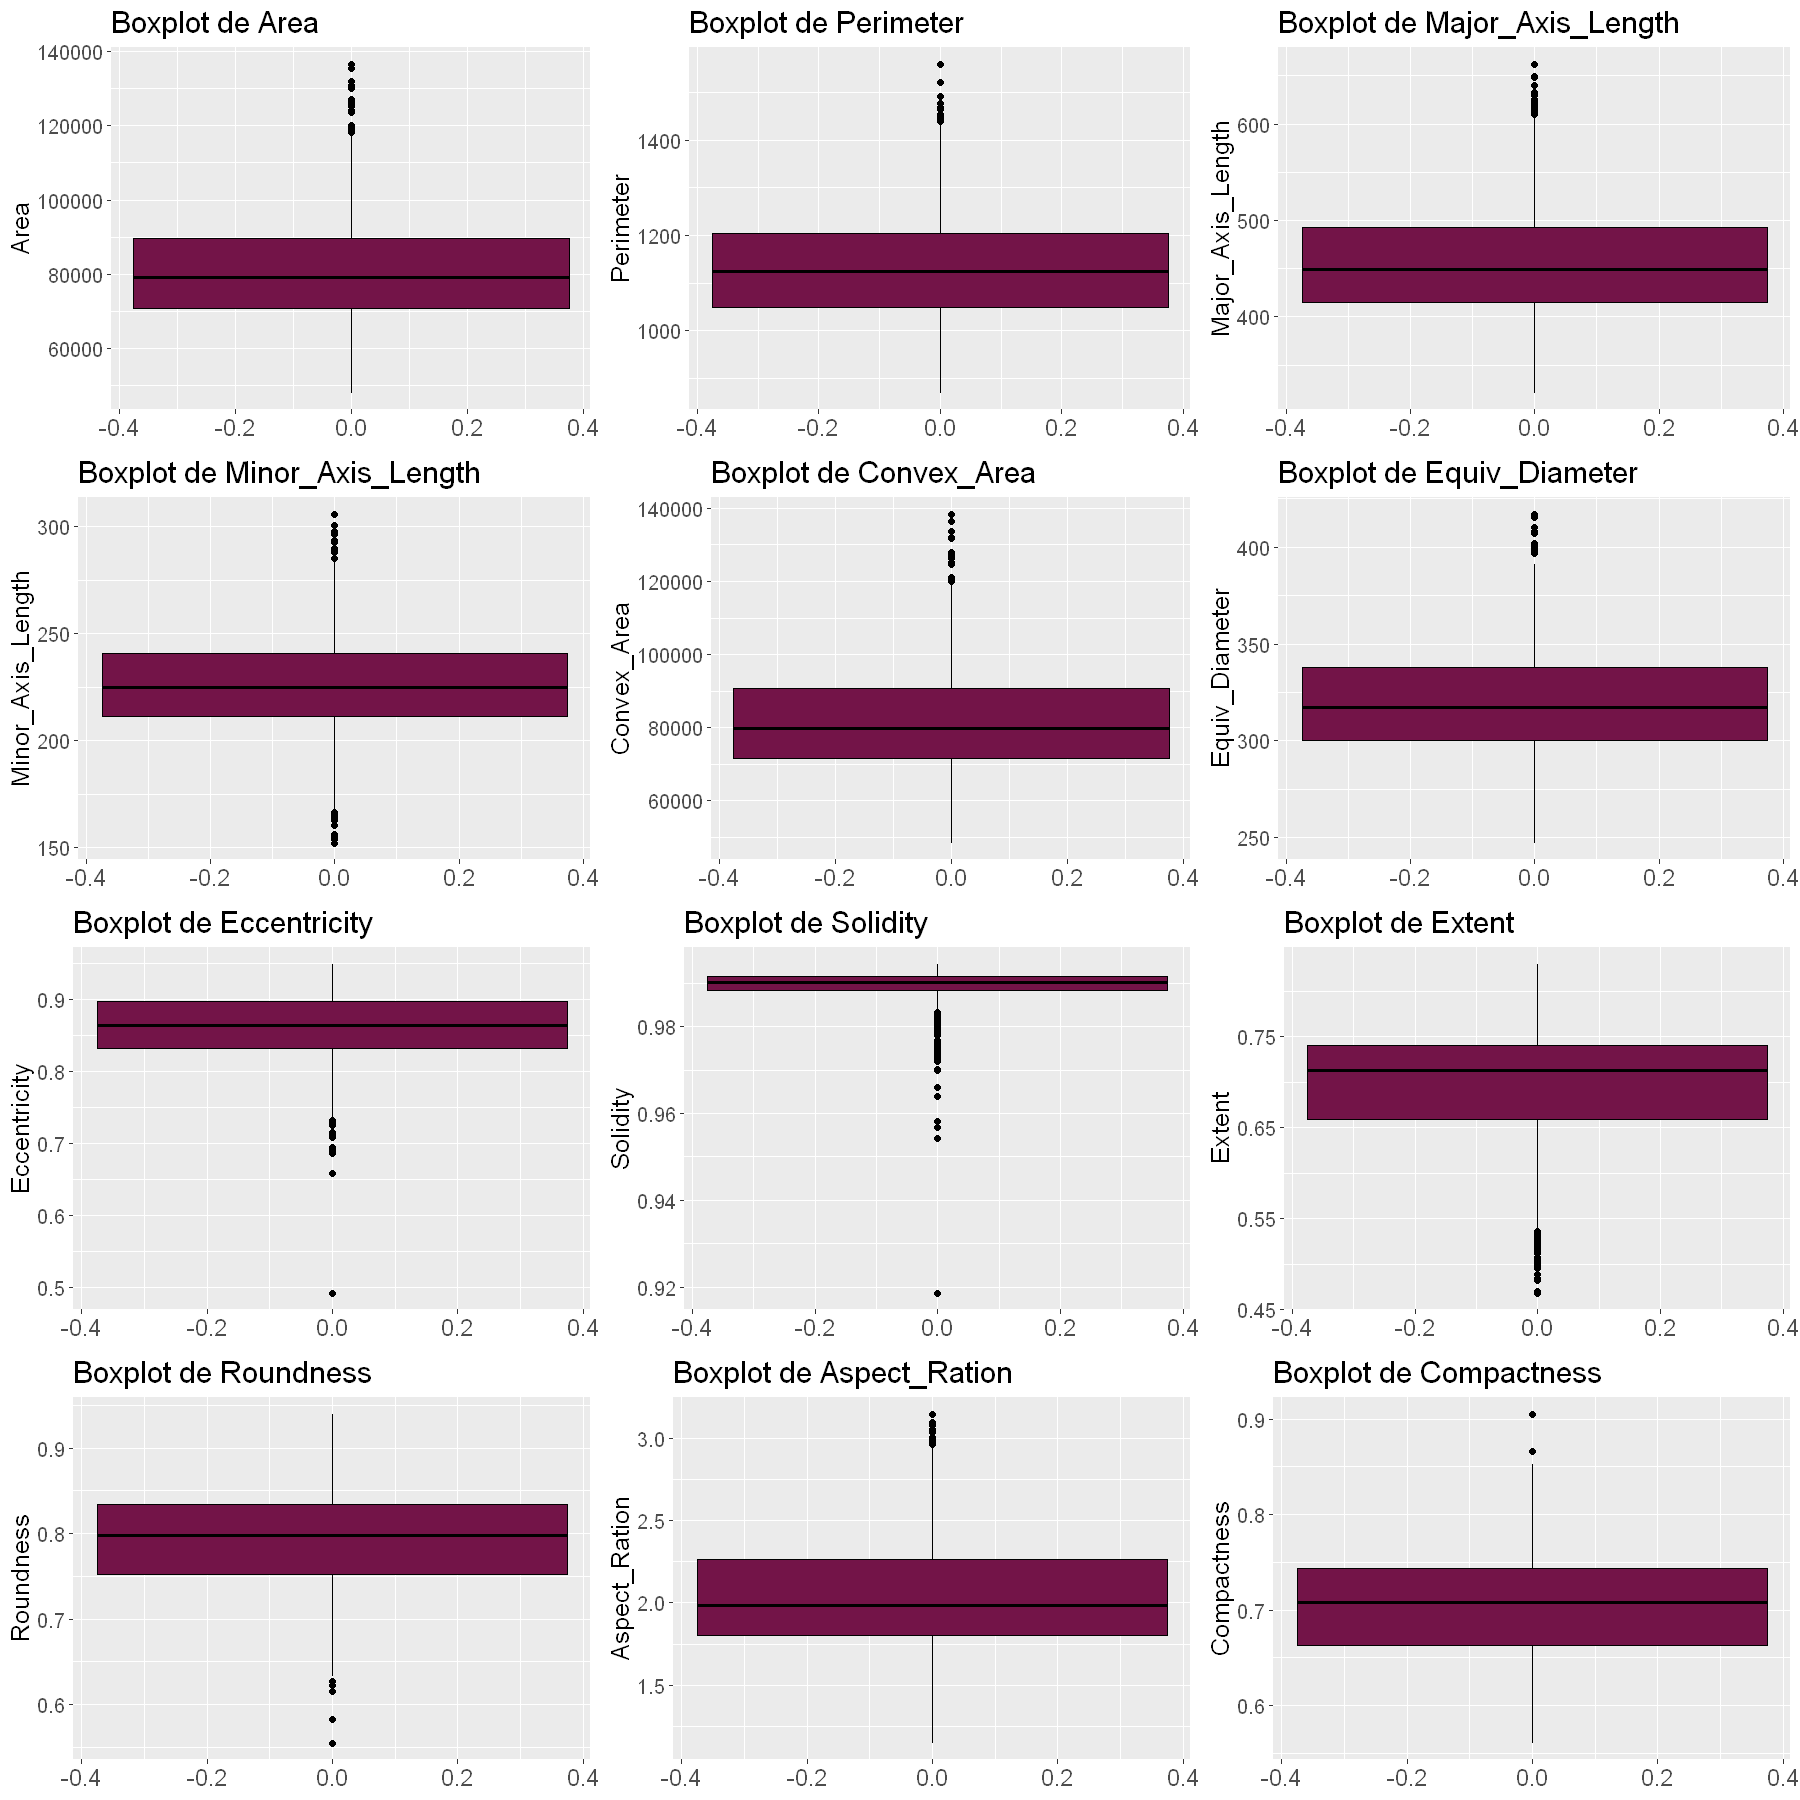

In [8]:
# Boxplots
for (variable in variables) {
  grafico <- ggplot(data) +
    aes_string(y = variable) +
    geom_boxplot(fill = '#731448', color = 'black') +
    theme(text = element_text(size = 15), axis.text.x = element_text(size = 14)) + 
    labs(title = paste("Boxplot de", variable))
  
  graficos_boxplot[[length(graficos_boxplot) + 1]] <- grafico
}

# Mostrar los boxplots en un grid
grid.arrange(grobs = graficos_boxplot, ncol = 3)

No solo observamos nuevamente la normalidad de nuestras distribuciones, sino que tambien observamos los outsiders por variable. Hay que ser meticulosos en el procedimiento de nuestro data set ya que todas las variables cuentan con al menos un par de valores atipicos. Confirmemos lo que observamos y hagamos una prueba grafica de normalidad con los qqplots:


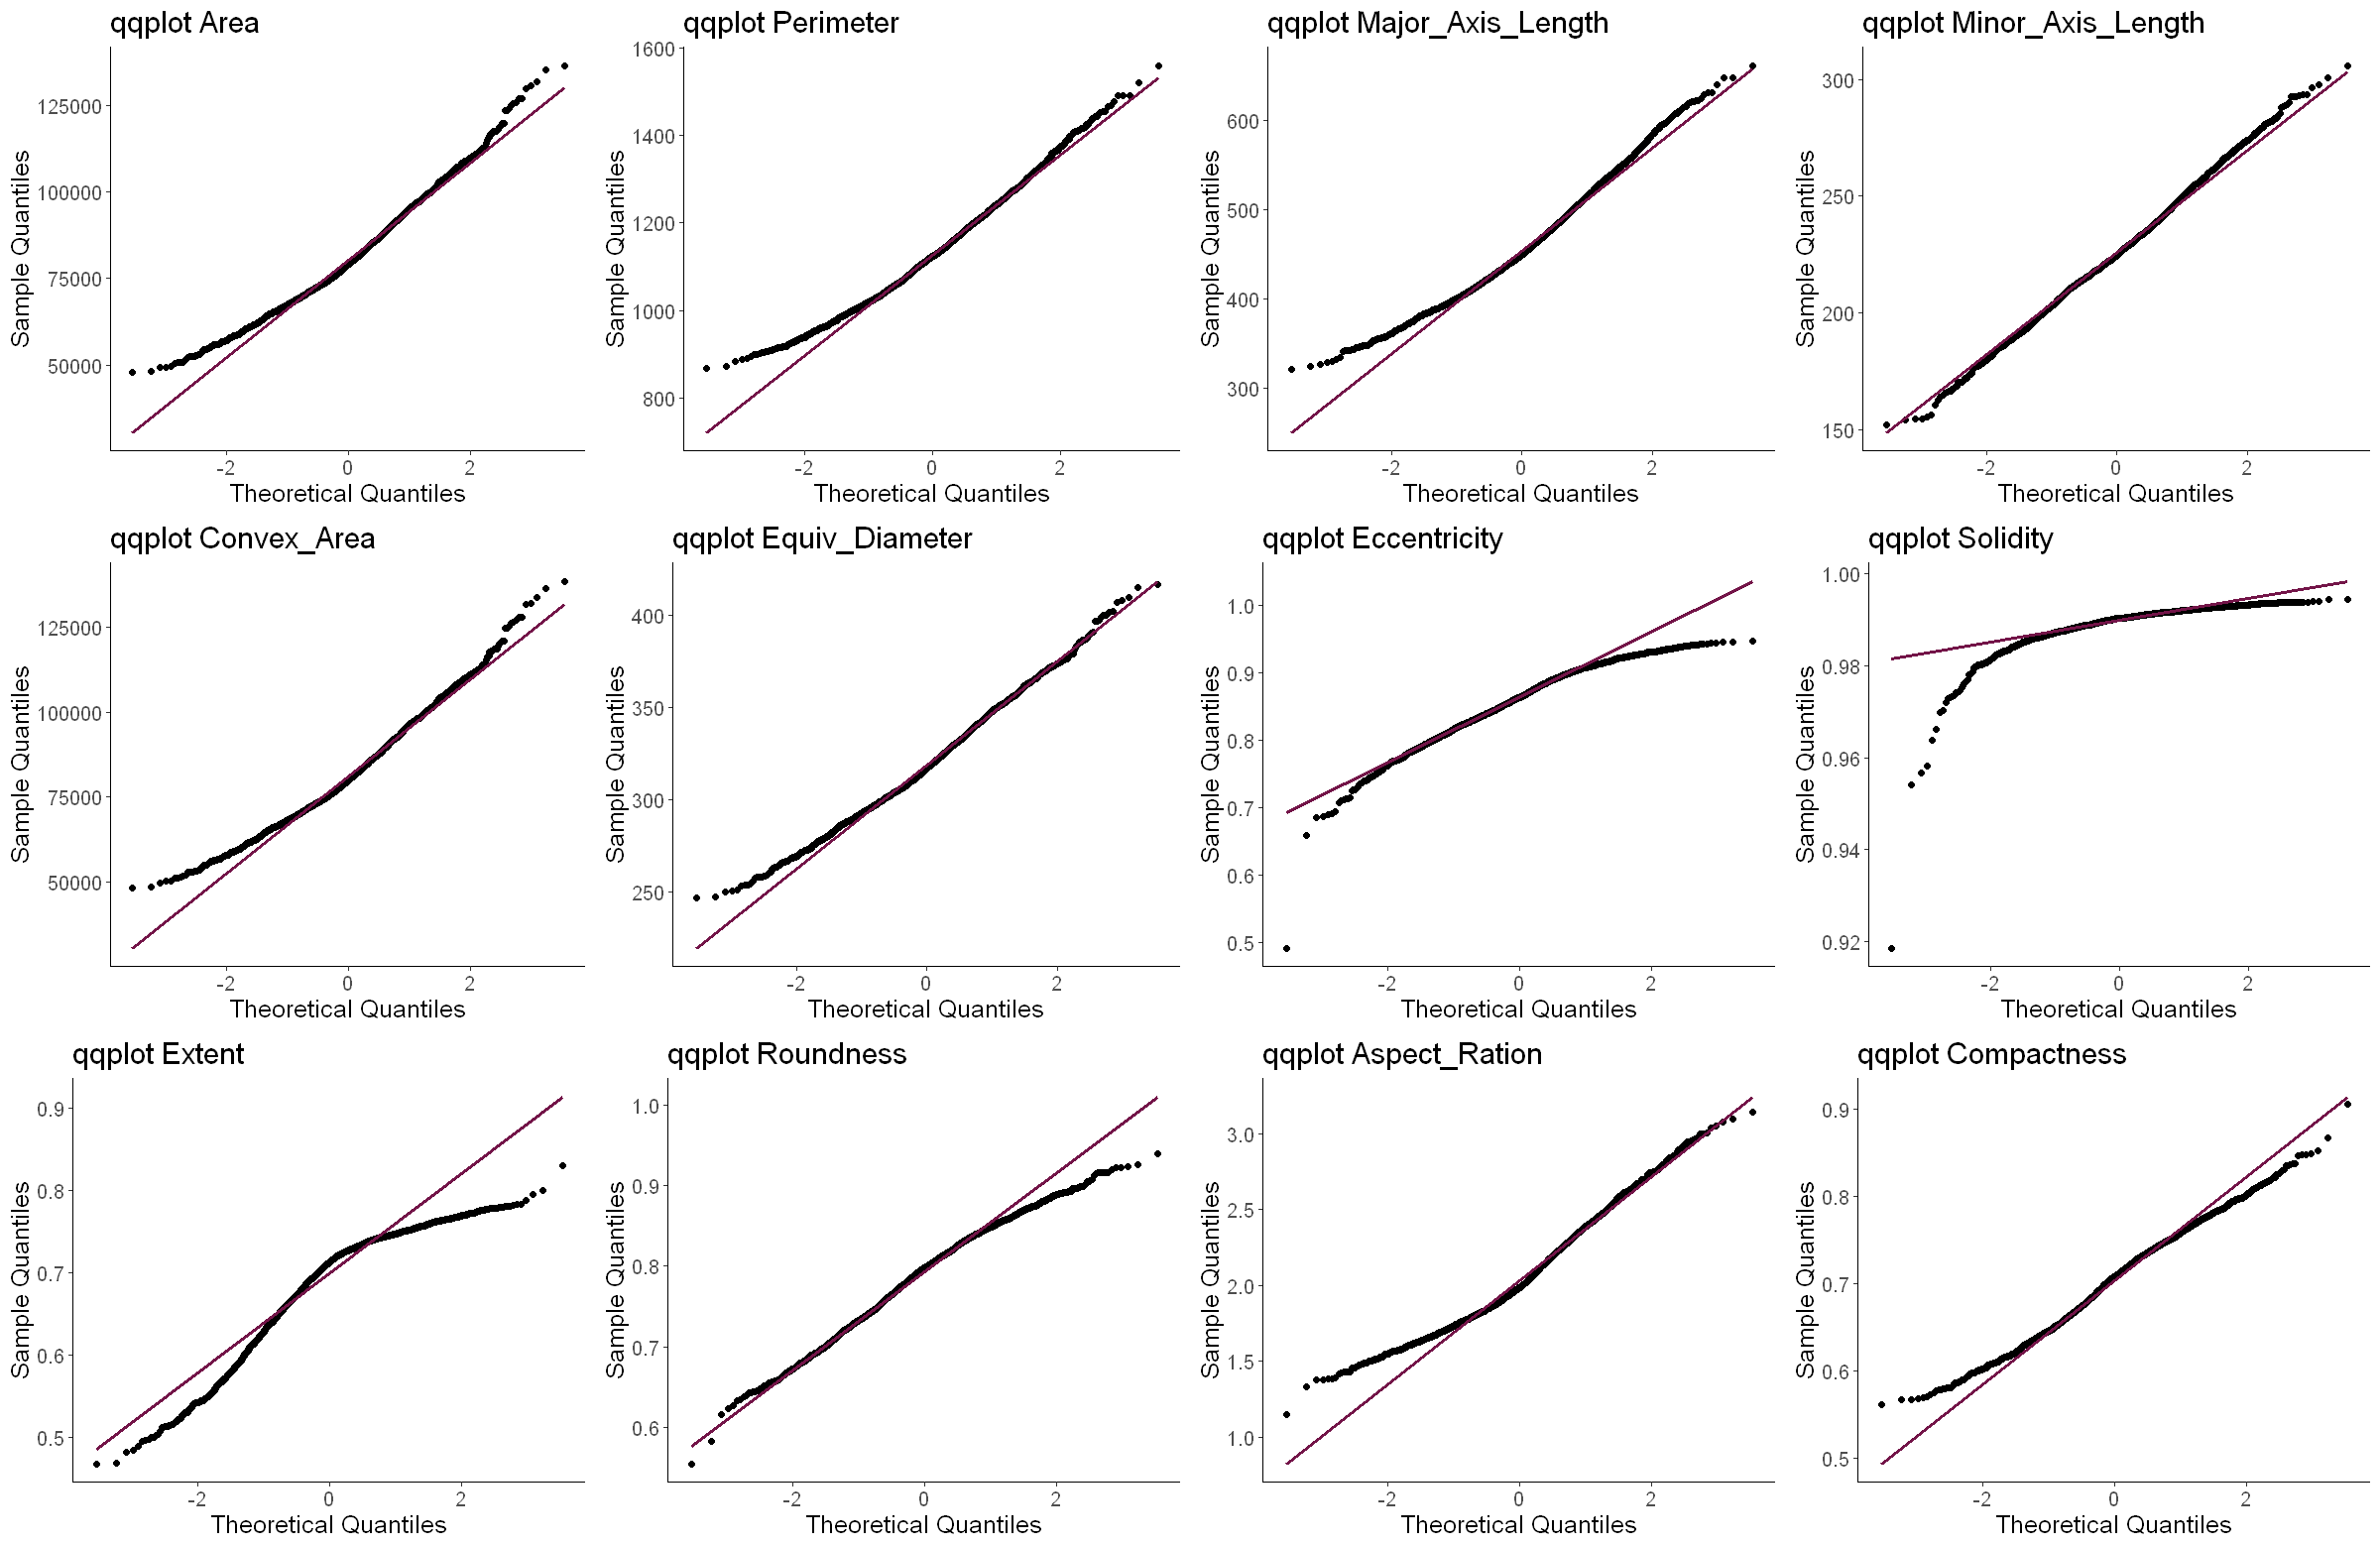

In [9]:
options(
  repr.plot.width = 20,  
  repr.plot.height = 13 
)

qq_plots = list()
var_data <- colnames(sub_set)


for (i in seq_along(var_data)) {
  variable = var_data[i]
  qq_plot = ggplot(data[!is.na(data[[variable]]), ],aes(sample = !!sym(variable))) +
    stat_qq() +
    stat_qq_line(color ='#731448', lwd = 1) +
    labs(title = paste('qqplot', variable),
         x = 'Theoretical Quantiles',
         y = 'Sample Quantiles') +
    theme_classic() +
    theme(text = element_text(size = 15))
  qq_plots[[i]] = qq_plot
}

grid.arrange(grobs = qq_plots, ncol = 4, widths = rep(2, 4))

Los valores atipicos en nuestra variable 'Extent' estan impactando negativamente en la distribucion normal. Si bien con el analisis estidistico y con el histograma parecia una varibale normal con cierta asimetria a izquierda, cuando la evaluamos con el qqplot vemos que estas cargas atipicas repercuten negativamente en la normalidad de la misma.

Ahora que ya hemos analizado la calidad de nuestros registros, el tipo de distribucion, la variabilidad de la distribucion, los valores atipicos y la normalidad de cada distribucion pasemos a ampliar el analisis respecto a nuestra variable objetivo "Class". Para esto haremos graficos de violin separando cada variable segun la clase de semilla a la que pertenece, teniendo una primera aproximacion a el grado de separabilidad que tenemos entre un grupo y otro para cada una de nuestras variables, pasando previamente por un breve analisis del balance de nuestro data set:

In [10]:
data$Class <- as.factor(data$Class)
subset_clases <- as.data.frame(table(data$Class))
colnames(subset_clases) <- c("Class", "Observaciones")
print(subset_clases)

          Class Observaciones
1    Çerçevelik          1300
2 Ürgüp Sivrisi          1200


In [11]:
# Reemplazar los valores de 'Class'
data <- data %>%
  mutate(Class2 = ifelse(Class == "Çerçevelik", 0, 1))

A partir de ahora llamaremos a la clase Çerçevelik como Clase 0, y a la clase Ürgüp Sivrisi como clase 1.

Nuestro data set esta muy bien balanceado, esto nos protege de ciertos segsos del modelo predictivo, minimizando las probabilidades de caer en errores de tipo I o tipo II. 

Aclaracion: los errores tipo I y tipo II van a terminar dependiendo totalmente de la calidad del diseno del modelo predictivo. Sin embargo, empezar con un data set balanceado es una buena senal.

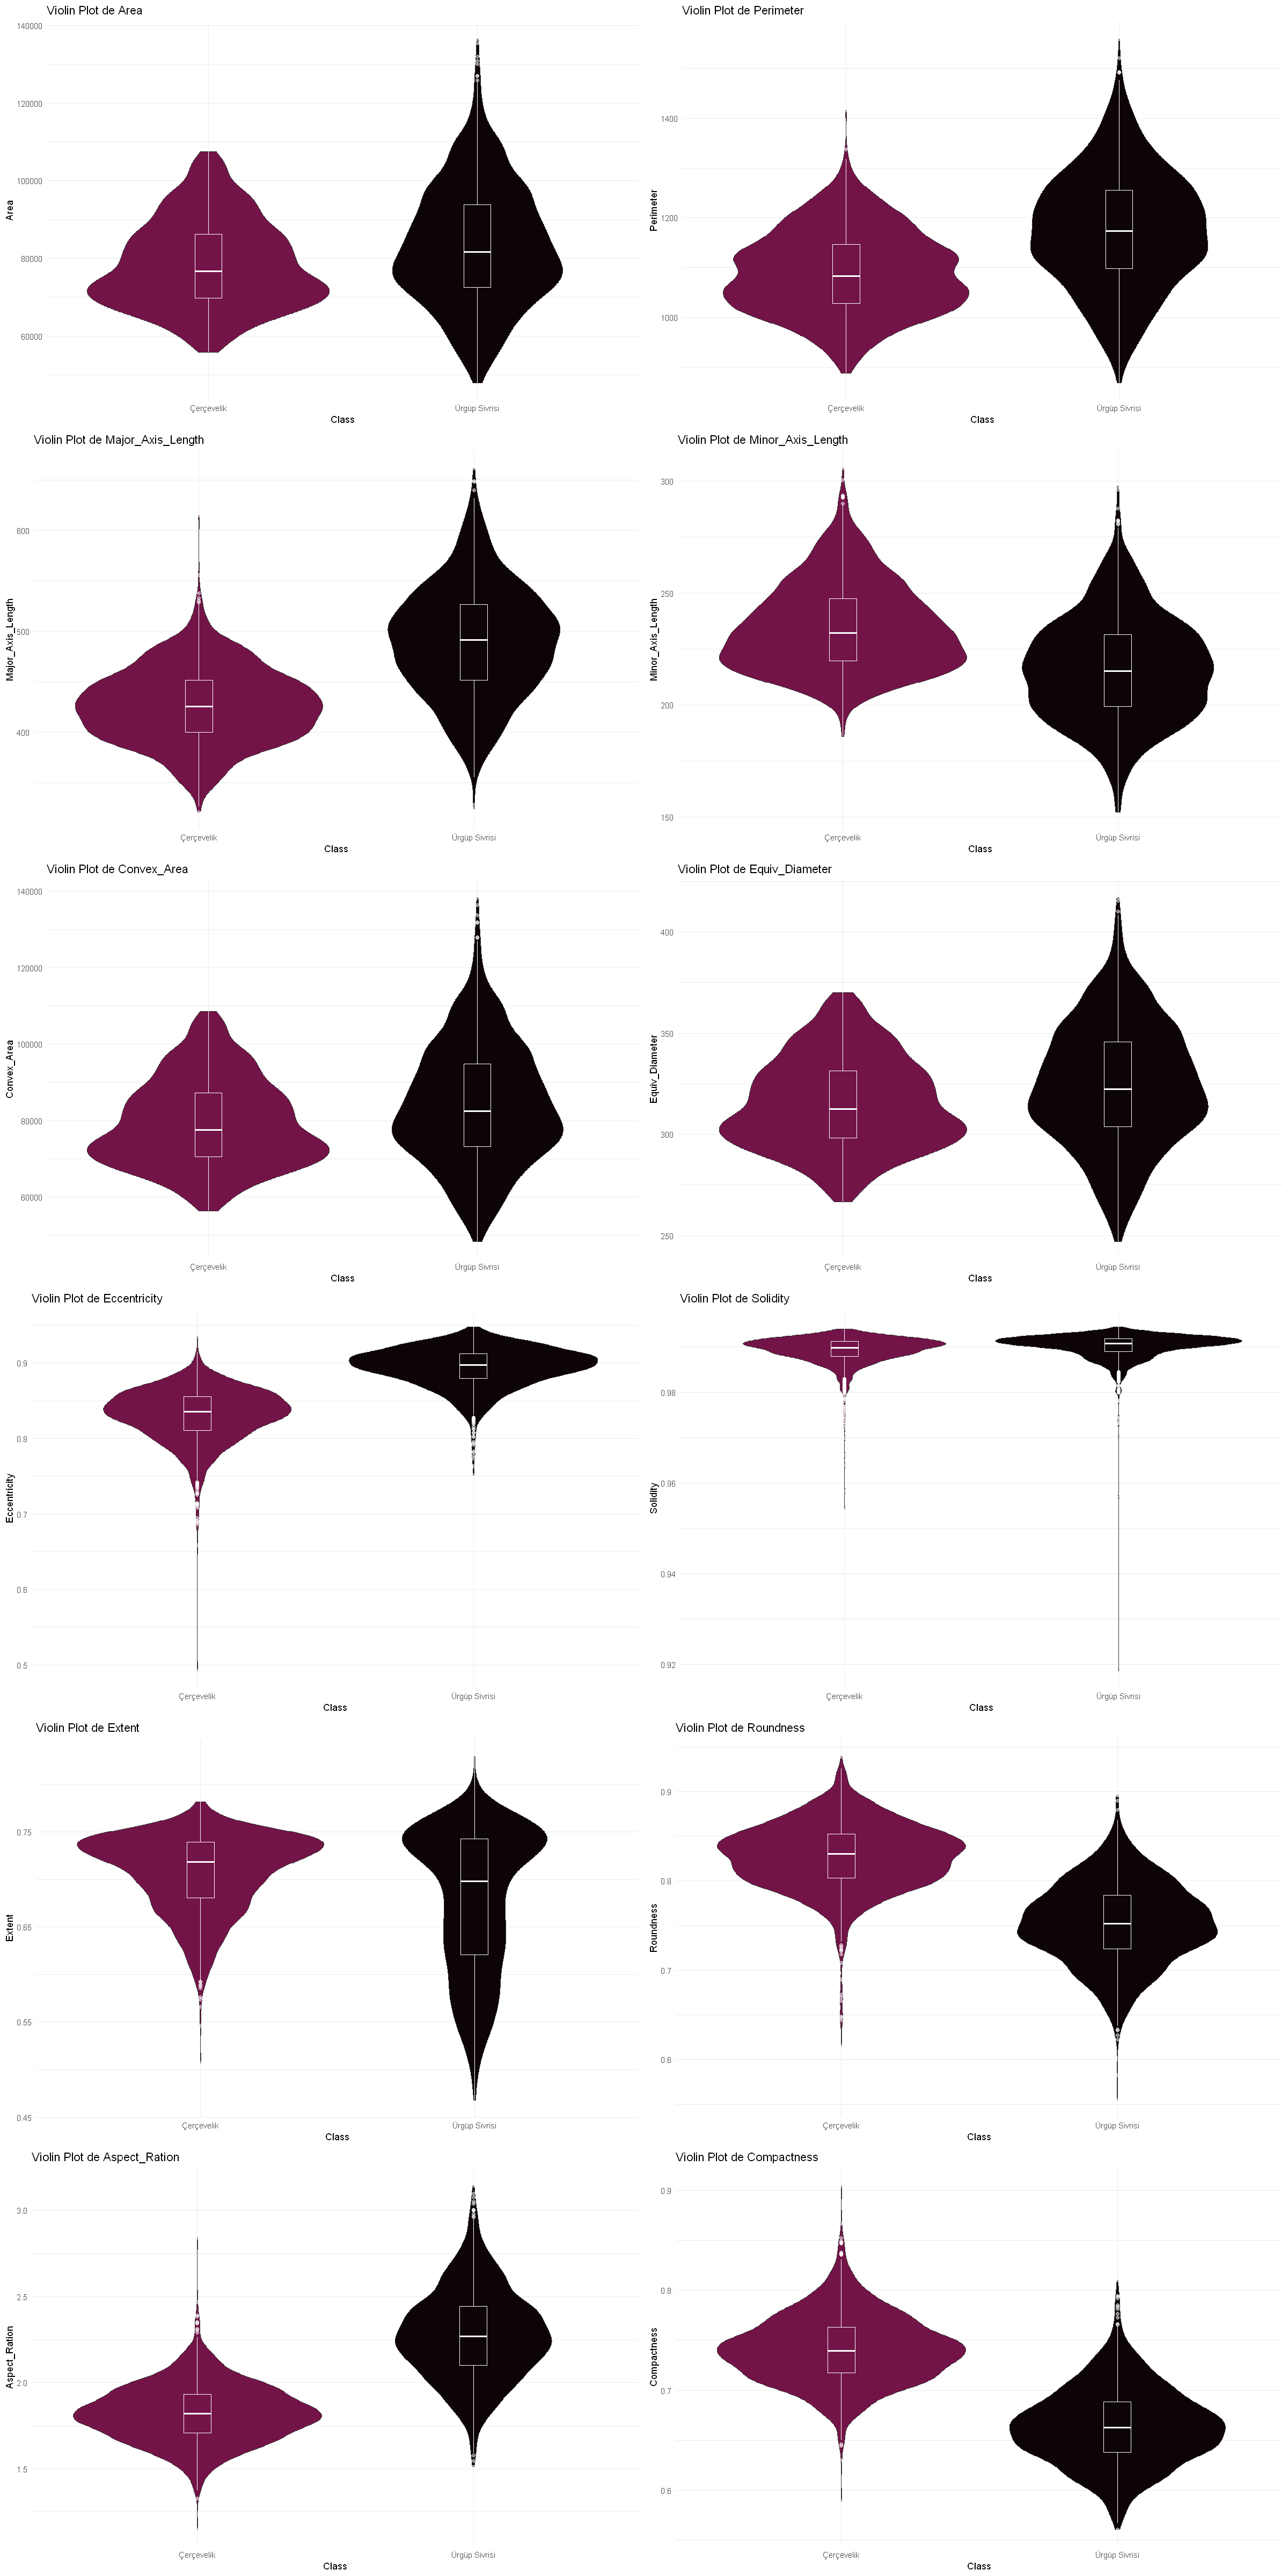

In [12]:
options(
  repr.plot.width = 20,  
  repr.plot.height = 40 
)

# Grafico de violin para todas las categorias de Class respecto a bmi
create_boxplot <- function(variable) {
  ggplot(data, aes(x = Class, y = !!rlang::sym(variable), fill = Class)) +
    geom_violin() +
    geom_boxplot(width = 0.1, color = "white", alpha = 0.5) +  # Añade líneas blancas alrededor de los boxplots
    labs(title = paste("Violin Plot de", variable),
         x = "Class",
         y = variable) +
    theme_minimal() +
    theme(legend.position="none") +  # Para ocultar la leyenda de colores
    scale_fill_manual(values = rev(c('#0D0409', '#731448')))  # Define los colores
}

# Lista para almacenar cada boxplot
boxplots_list <- lapply(colnames(sub_set), create_boxplot)

# Crear un grid array con los boxplots
grid.arrange(grobs = boxplots_list, ncol = 2)


Esto mismo tambien lo podemos observar en cada histograma diferenciado por clase:

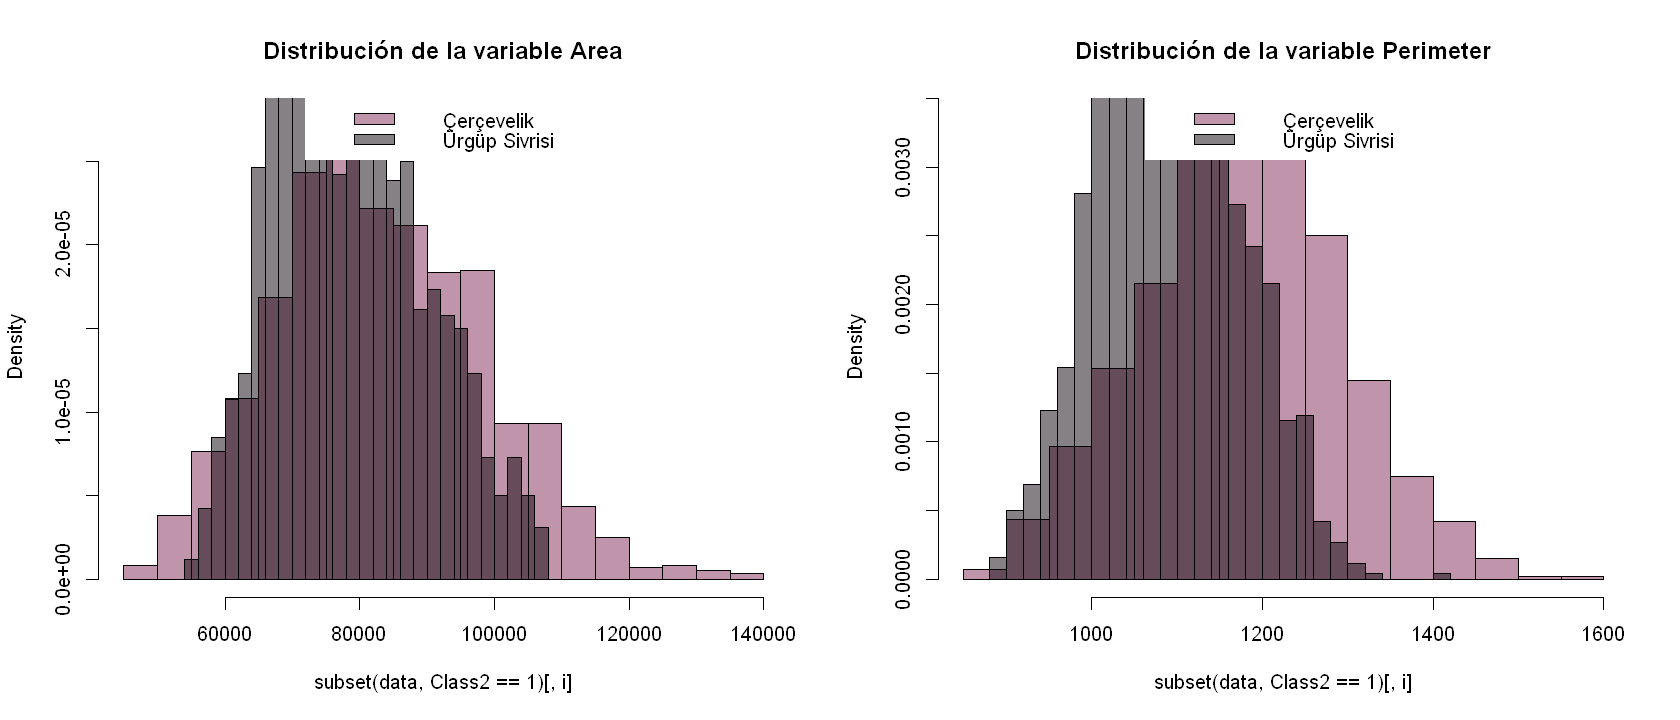

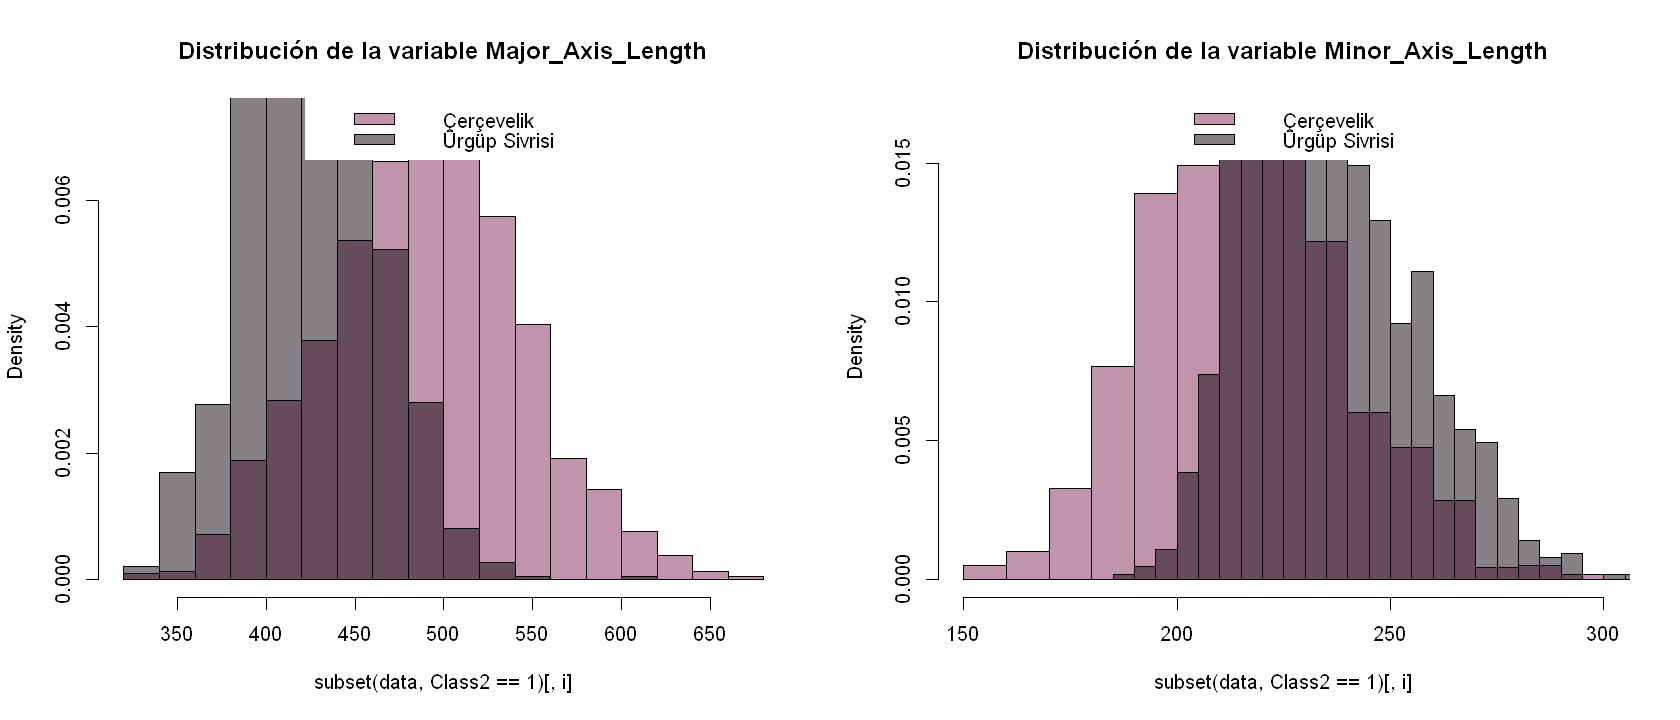

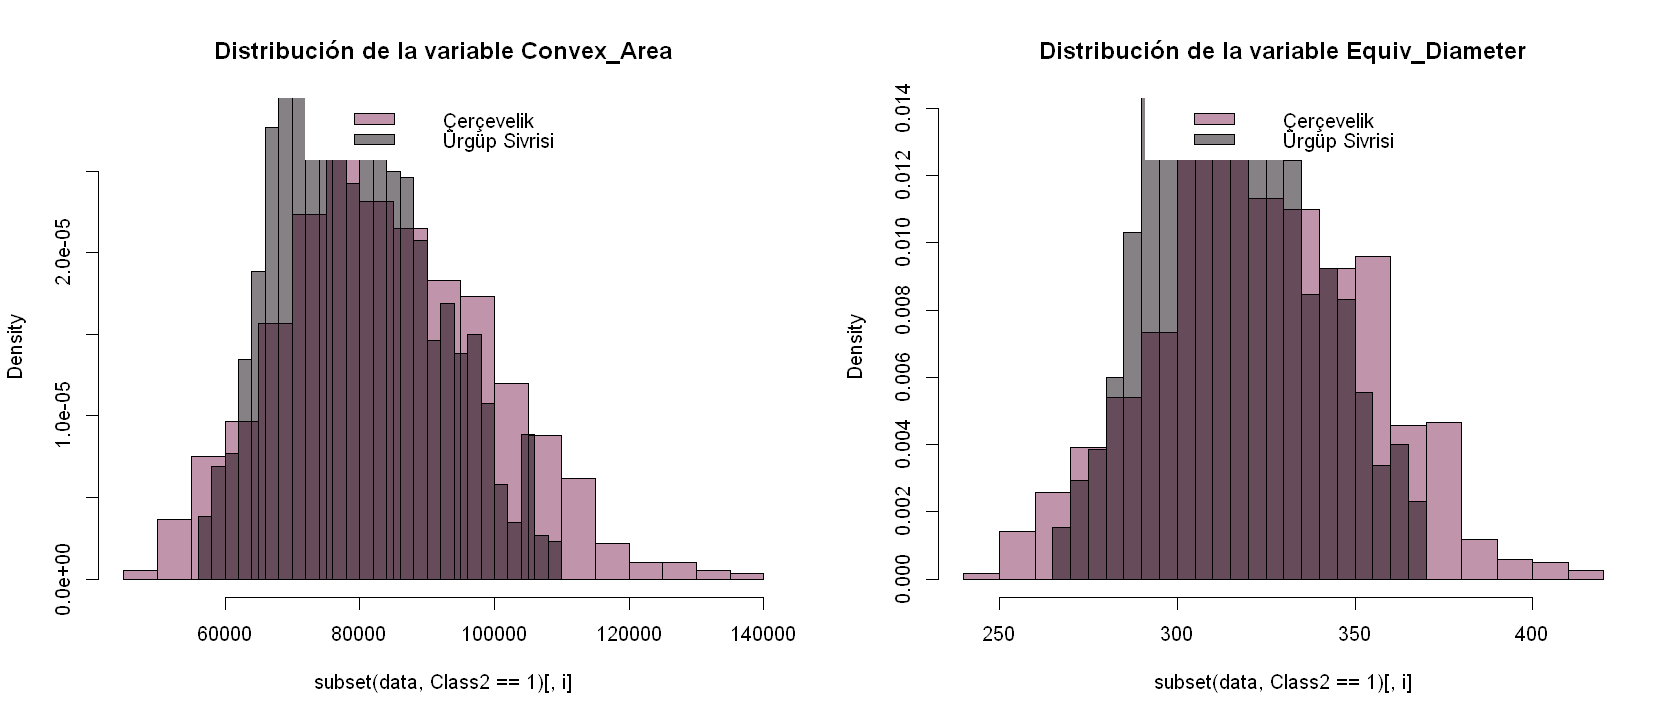

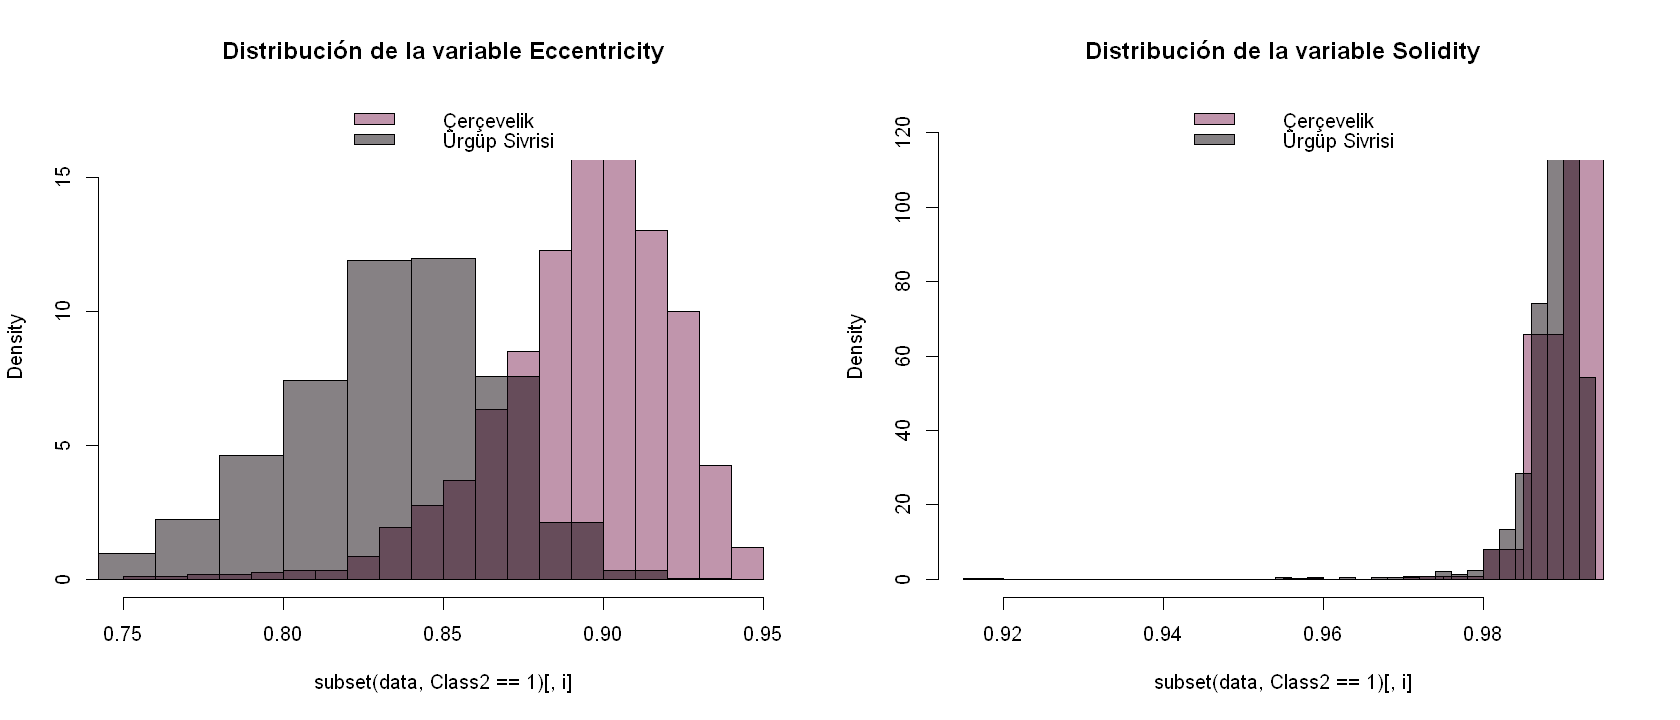

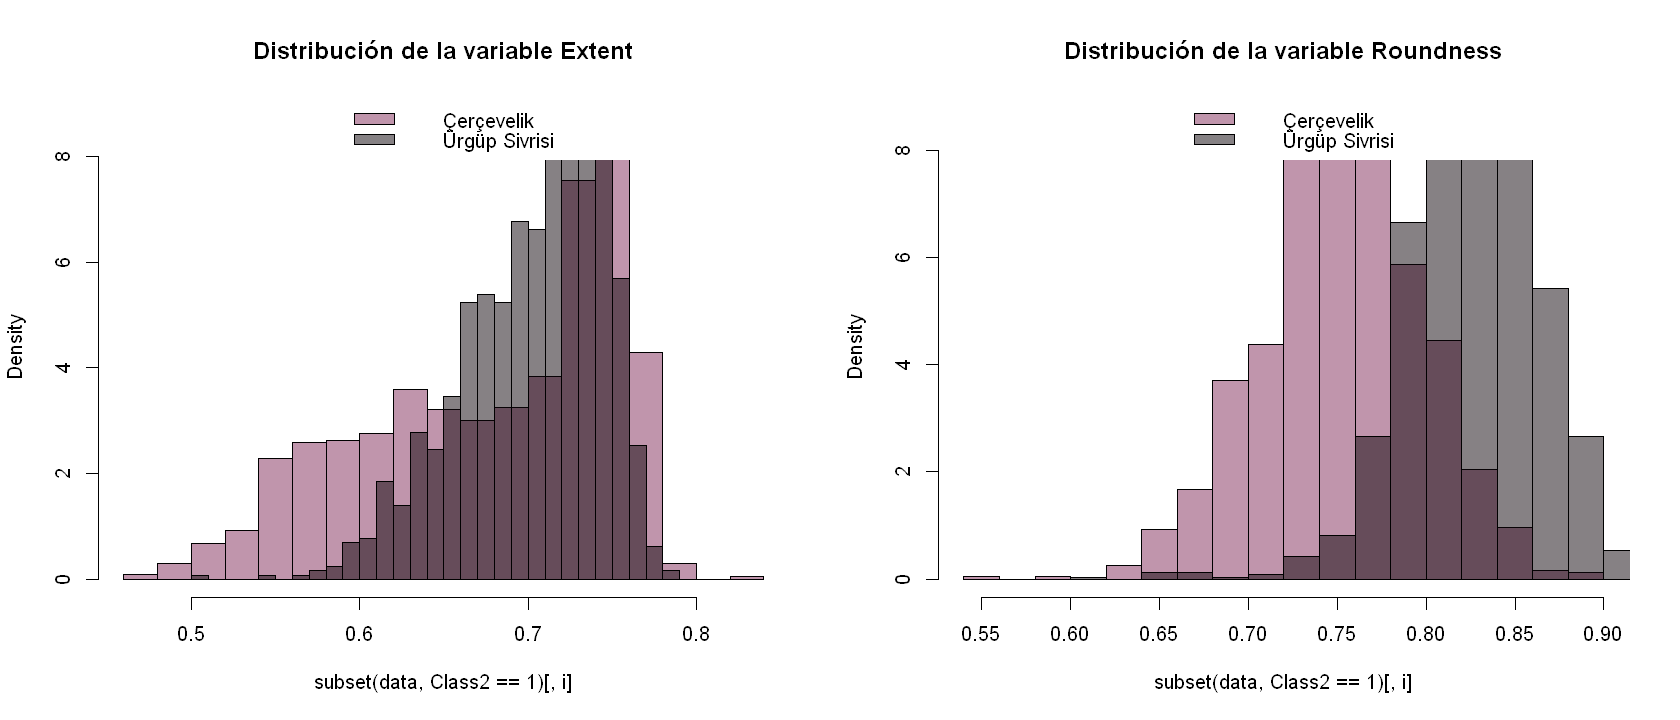

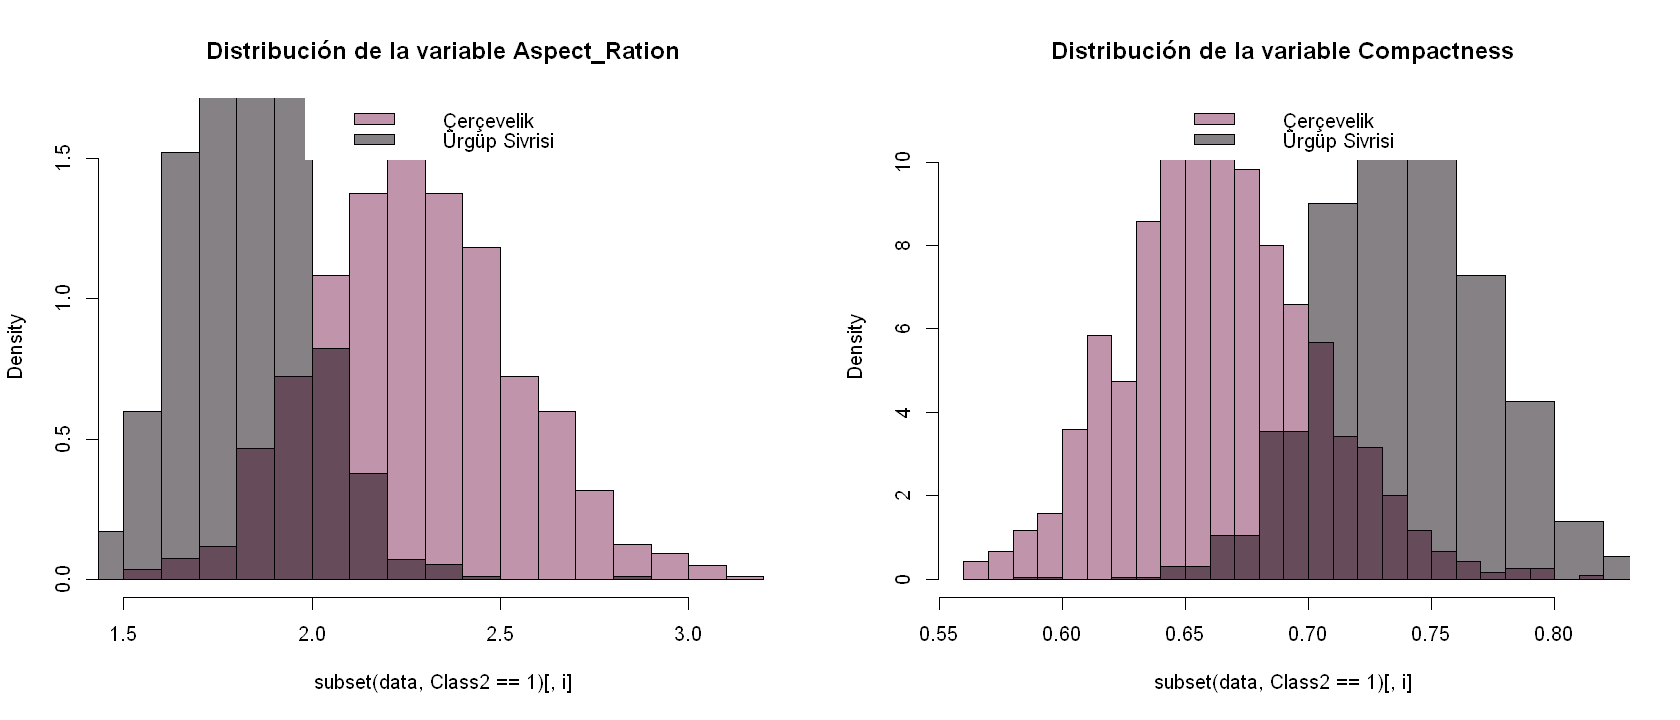

In [13]:
options(
  repr.plot.width = 14,
  repr.plot.height = 6
)

# Establecer disposición de la ventana gráfica
par(mfrow = c(1, 2))

# Bucle para graficar
for (i in 1:((length(colnames(data)))-2)) {
  
  # Color correspondiente a Clase 1
  color_clase1 <- rgb(115/255, 20/255, 72/255, 0.45)
  # Color correspondiente a Clase 0
  color_clase0 <- rgb(13/255, 4/255, 9/255, 0.5)
  
  # Histograma para la Clase 1
  hist(subset(data, Class2 == 1)[, i],
       col = color_clase1,
       main = paste0("Distribución de la variable ", colnames(data)[i]),
       freq = FALSE,
       breaks = 20)  # Ajusta el número de intervalos
  
  # Añadir histograma para la Clase 0
  hist(subset(data, Class2 == 0)[, i],
       col = color_clase0,
       add = TRUE,
       freq = FALSE,
       breaks = 20)  # Ajusta el número de intervalos
  
  # Leyenda
  legend(x = "topright", legend = c('Çerçevelik', 'Ürgüp Sivrisi'), fill = c(color_clase1, color_clase0), box.lty = "blank")
  
  # Cambiar a la siguiente fila cada 2 gráficas
  if (i %% 2 == 0) {
    par(mfrow = c(1, 2))
  }
}


Si bien hay algunas variables que no aportan mucha separacion en cada clase, la gran mayoria de las variables continuas independientes que tenemos en nuestra base de datos indican en principio que hay diferencias en cada categoria. Tambien podemos ver como los valores atipicos nos generan ruido en la interpretacion, ya que repercuten fuertemente en la distribucion de las variables y por ende en la separabilidad de cada categoria. A modo de comentar un ejemplo de separabiliad entre clases, sobre todo en el segundo grafico observamos que la variable 'Compactness' tiene dos distribuciones totalmente diferentes para cada clase de calabaza.

En conclusion: tenemos una base de datos bastante prometedora para generar un modelo de regresion logistica capaz de predecir el tipo de clase de cada calabaza. Debemos evaluar correlaciones, ANOVA y PCA, para ver como queda definido el modelo final y que capacidad predictiva tiene el mismo. No esta de mas aclarar, que los valores atipicos, como ya mencionamos, nos pueden generar distorciones. Sin embargo, tomamos la decision de no tratar los mismos, plantear el modelo, y observar los resultados. Dependiendo como den los mismos, veremos si es necesario limpiar la base de datos.

### <font color='#731448'>**2. Seleccion de variables**</font>

Lo primero que haremos en este caso es evaluar las correlaciones de cada variable respecto a nuestra variable objetivo, a nivel general y luego para cada clase. Luego de esto, convertiremos nuestra variable binaria en numerica y haremos un modelo de regresion lineal univariable para cada una de las variables independientes que tienen cierta correlacion con nuestra variable objetivo. Una vez que hayamos identificado las variables independientes significativas, pasaremos a evaluar la correlacion entre cada una de nuestras variables independientes significativas. Esto lo hacemos, ya que queremos ahorrarnos inconvenientes de multicolinealidad, dado que si hay alta correlacion entre algun par de variables independientes, estamos otorgandole al modelo mayor inestabilidad. Luego, pasaremos a realizar un analisis PCA, para terminar de definir de nuestras variables independientes significativas no correlacionadas, cuales aportan mayor explicacion a la varianza. Por ultimo, haremos un ANOVA, para evaluar si existen difrencias de medias significativas entre las medias de las clases de semillas.

#### <font color='#731448'>  2.1 IGA </font>

Estos dos algoritmos que se mencionan a continuacion se utilizan para evaluar la relacion entre la variable objetivo (o target) y las variables explicativas (o covariables) en un conjunto de datos. Cada algoritmo proporciona una medida diferente de la importancia de una covariable en relacion con la variable objetivo:

<font color='#731448'>**1. Infogain:**</font> mide cuanta información adicional se obtiene sobre la variable objetivo al agregar una covariable en particular al modelo. Es decir, evalua cuánto mejora nuestro conocimiento sobre la variable objetivo al considerar una covariable especifica.

<font color='#731448'>**2. Symmetrical Uncertainty (Symuncert):**</font>mide la dependencia mutua entre la variable objetivo y una covariable. Es simétrico y considera la información de ambas variables. Es decir, evalua la relacion entre la variable objetivo y una covariable, buscando un equilibrio que no favorezca a covariables con muchas opciones ni a aquellas con pocas opciones.

<font color='#731448'>**3. Gain Ratio:**</font> El Gain Ratio es una mejora de Infogain que ajusta la medida para tener en cuenta la cantidad de opciones que puede tener una covariable. Evita favorecer covariables con más opciones. Intenta ser justo al comparar covariables con diferentes cantidades de valores distintos, evitando dar preferencia a aquellas con más opciones. Al tener un data set equilibrado en las clases de nuestra variable objetivo, esperamos que este sea el que menos informacion nos aporte.

En resumen, estos algoritmos se utilizan para entender cuanta información aportan las covariables sobre la variable objetivo. Cada uno tiene sus propias características y se elige según las necesidades específicas del análisis de datos. 

Warning message in .information_gain.data.frame(x = x, y = y, type = type, equal = equal, :
"Dependent variable is a numeric! It will be converted to factor with simple factor(y). We do not discretize dependent variable in FSelectorRcpp by default! You can choose equal frequency binning discretization by setting equal argument to TRUE."


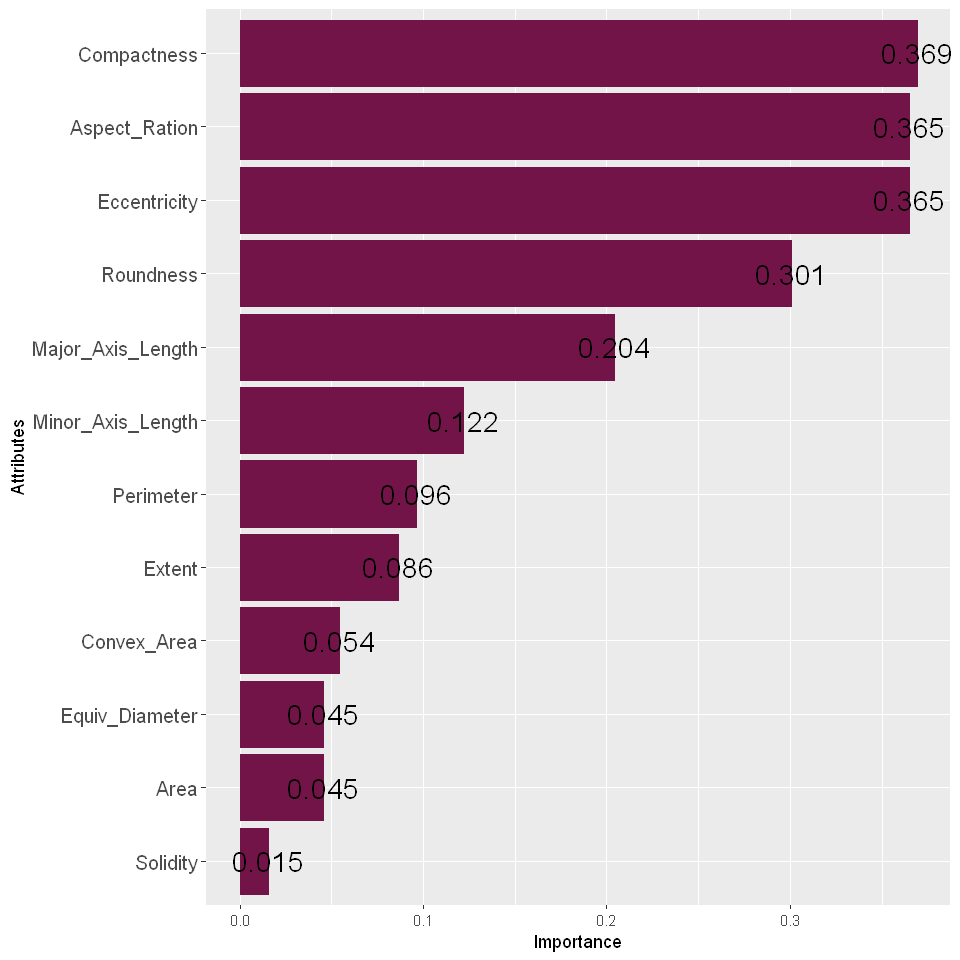

In [14]:
data$Class <- NULL
options(repr.plot.width = 8, repr.plot.height = 8 )
ig = information_gain(formula = Class2 ~ .
                     , data = data
                     , type = 'infogain')

ggplot(ig, aes(x = reorder(attributes, +importance), y = importance)) +
 geom_bar(stat = "identity", fill = "#731448", color = "#731448") +
geom_text(aes(label =  round(importance, 3)),  color = "black",size = 6) +  # Agregar etiquetas de valores 
  coord_flip() +
  labs(x = "Attributes", y = "Importance")+
  theme(
    axis.text.y = element_text(size = 12))

Aqui estamos evaluando nuestra variable objetivo, versus el resto de nuestras variables independientes, intentando encontrar el poder explicativo de cada una de ellas (sobre nuestra variable dependiente/objetivo). De este modelo seleccionariamos aquellas que tengan que aportan mayor informacion de nuestra variable objetivo, estas son: Compacteness, Aspect_Ration, Eccentricity, Roundness y Major_Axis_Lenght, dado que hemos seleccionado arbitrariamente un corte en 0,2.

Warning message in .information_gain.data.frame(x = x, y = y, type = type, equal = equal, :
"Dependent variable is a numeric! It will be converted to factor with simple factor(y). We do not discretize dependent variable in FSelectorRcpp by default! You can choose equal frequency binning discretization by setting equal argument to TRUE."


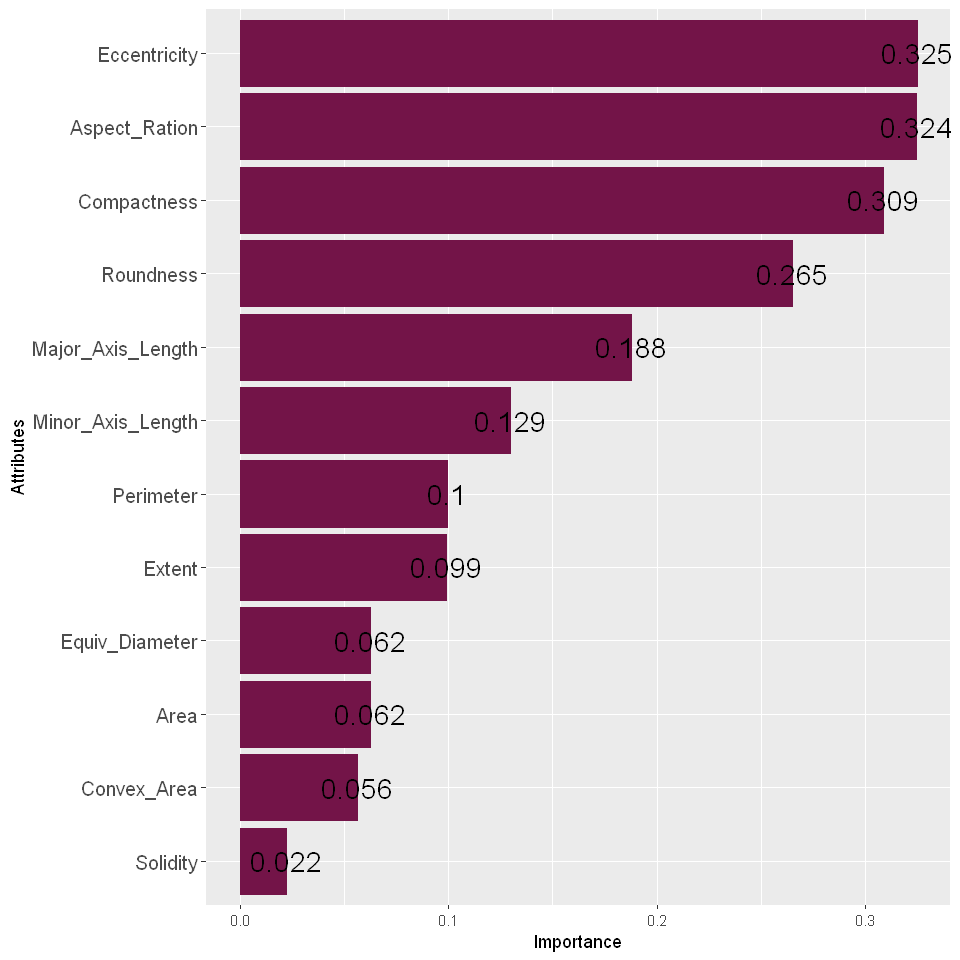

In [15]:
sc = information_gain(formula = Class2 ~ .
                     , data = data
                     , type = 'symuncert')

ggplot(sc, aes(x = reorder(attributes, +importance), y = importance)) +
 geom_bar(stat = "identity", fill = "#731448", color = "#731448") +
geom_text(aes(label =  round(importance, 3)),  color = "black",size = 6) +  # Agregar etiquetas de valores 
  coord_flip() +
  labs(x = "Attributes", y = "Importance")+
  theme(
    axis.text.y = element_text(size = 12))

Este modelo nos aporta una menor cantidad de variables capaces de contener informacion de nuestra variable objetivo. Como sostenemos el mismo criterio arbitrario de realizar el corte para aquellas mayores a 0,2, las variables de interes son: Eccentricity, Aspect_Ration, Compactness y Roundness. Por ultimo realizaremos el algoritmo Gain Ratio:

Warning message in .information_gain.data.frame(x = x, y = y, type = type, equal = equal, :
"Dependent variable is a numeric! It will be converted to factor with simple factor(y). We do not discretize dependent variable in FSelectorRcpp by default! You can choose equal frequency binning discretization by setting equal argument to TRUE."


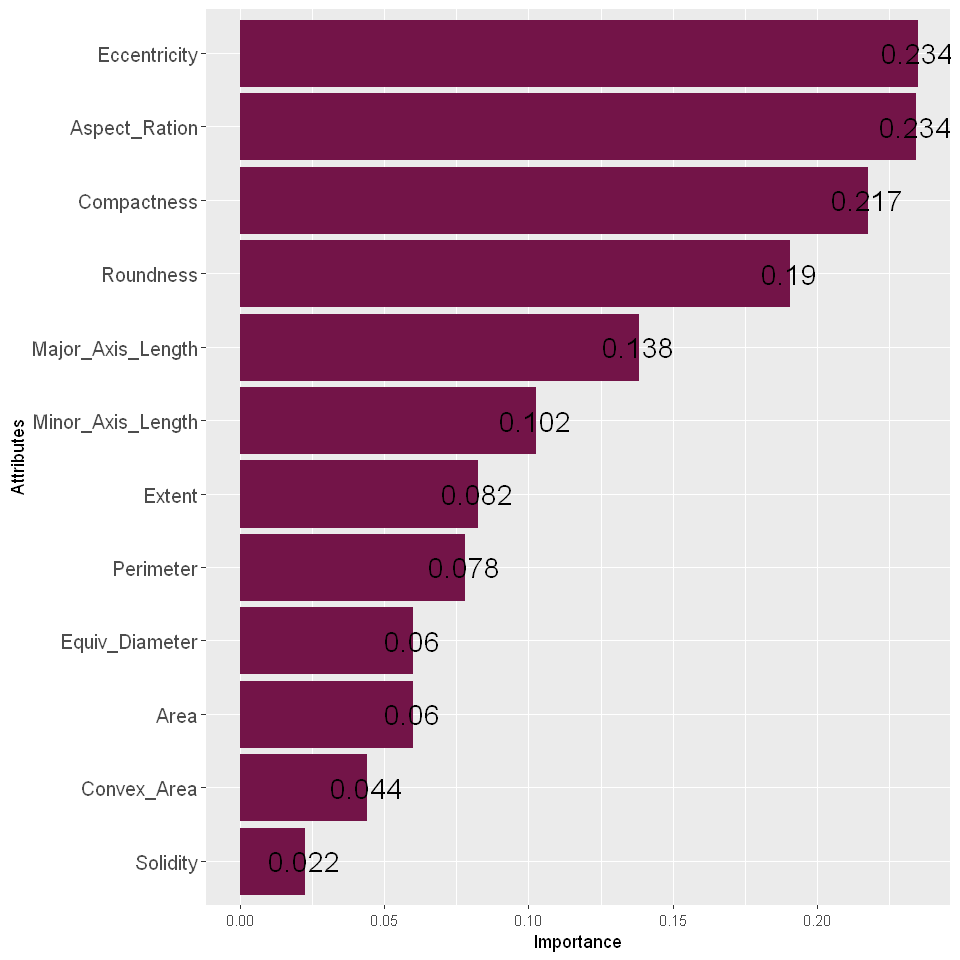

In [16]:
gr = information_gain(formula = Class2 ~ .
                     , data = data
                     , type = 'gainratio')

ggplot(gr, aes(x = reorder(attributes, +importance), y = importance)) +
 geom_bar(stat = "identity", fill = "#731448", color = "#731448") +
geom_text(aes(label =  round(importance, 3)),  color = "black",size = 6) +  # Agregar etiquetas de valores 
  coord_flip() +
  labs(x = "Attributes", y = "Importance")+
  theme(
    axis.text.y = element_text(size = 12))

Tal como dijimos previamente, este algoritmo esta preparado para resolver problemas de balanceo. Como nuestra base de datos cuenta con un nivel muy parejo de observaciones entre ambas variables, esperamos que sea el menos relevante. Sin embargo, al no estar perfectamente balanceada nuestro data set obtenemos algunos resultados diferentes al primer algoritmo planteado. En este caso las variables Eccentricity y Aspect_Ration, se mantienen consistentes con el arreglo.

Como resumen de los resultados de los tres algoritmos, nos quedaremos con las siguientes variables: Compacteness, Aspect_Ration, Eccentricity, Roundness y Major_Axis_Lenght. Si bien el segundo modelo no toma a Major_Axis_lenght, al realizar un corte arbitrario en 0,2 y este tener un valor muy cercano al mismo decidimos incluirlo. El tercer modelo nos ratifica las variables Eccentricity y Aspect_Ration como consistentes mas alla del pequenio desbalance del data set. 

#### <font color='#731448'>  2.2 Analisis de correlaciones </font>

In [17]:
summary(data)

      Area          Perimeter      Major_Axis_Length Minor_Axis_Length
 Min.   : 47939   Min.   : 868.5   Min.   :320.8     Min.   :152.2    
 1st Qu.: 70765   1st Qu.:1048.8   1st Qu.:415.0     1st Qu.:211.2    
 Median : 79076   Median :1123.7   Median :449.5     Median :224.7    
 Mean   : 80658   Mean   :1130.3   Mean   :456.6     Mean   :225.8    
 3rd Qu.: 89758   3rd Qu.:1203.3   3rd Qu.:492.7     3rd Qu.:240.7    
 Max.   :136574   Max.   :1559.5   Max.   :661.9     Max.   :305.8    
  Convex_Area     Equiv_Diameter   Eccentricity       Solidity     
 Min.   : 48366   Min.   :247.1   Min.   :0.4921   Min.   :0.9186  
 1st Qu.: 71512   1st Qu.:300.2   1st Qu.:0.8317   1st Qu.:0.9883  
 Median : 79872   Median :317.3   Median :0.8637   Median :0.9903  
 Mean   : 81508   Mean   :319.3   Mean   :0.8609   Mean   :0.9895  
 3rd Qu.: 90798   3rd Qu.:338.1   3rd Qu.:0.8970   3rd Qu.:0.9915  
 Max.   :138384   Max.   :417.0   Max.   :0.9481   Max.   :0.9944  
     Extent         Roundne

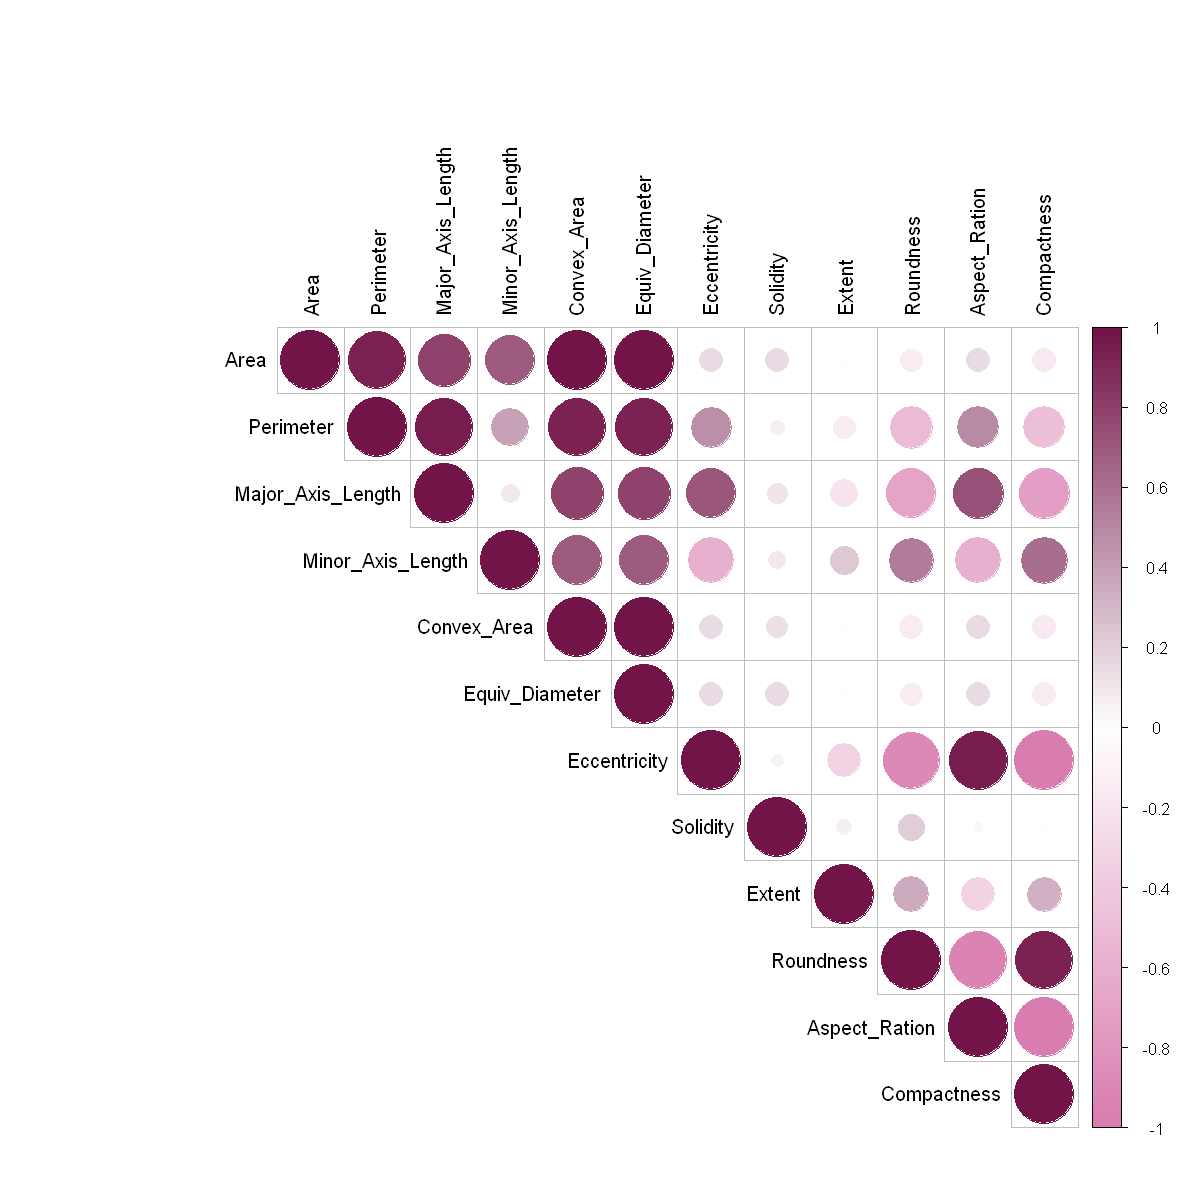

In [18]:
subset_data <- subset(data, select = -Class2)
options(repr.plot.width = 10,  
  repr.plot.height = 10 )
corrplot::corrplot(cor(subset_data)
                   , type = "upper"
                   , number.cex = .6
                   , tl.col = "black"
                   , col = colorRampPalette(c("#D97CAF", 'white', "#731448"))(100) 
                   , tl.srt = 90)


In [19]:
# Calcular la matriz de correlación
correlation_matrix <- cor(data, method = "pearson")  # Puedes cambiar el método según tus necesidades

# Extraer la columna de correlaciones con la variable "Class2"
correlation_with_class2 <- correlation_matrix["Class2", ]

# Crear un data frame para mostrar los resultados
correlation_table <- data.frame(`Correlation with Class2` = correlation_with_class2)

# Imprimir o ver la tabla de correlación
print(correlation_table)

                  Correlation.with.Class2
Area                            0.1702802
Perimeter                       0.3883454
Major_Axis_Length               0.5614578
Minor_Axis_Length              -0.4013625
Convex_Area                     0.1680295
Equiv_Diameter                  0.1603026
Eccentricity                    0.6993187
Solidity                        0.1226739
Extent                         -0.2360759
Roundness                      -0.6695139
Aspect_Ration                   0.7217964
Compactness                    -0.7266759
Class2                          1.0000000


In [20]:
# Crear un data frame vacío para almacenar los resultados
regression_table <- data.frame(Variable = character(), Coefficient = numeric(), PValue = numeric(), stringsAsFactors = FALSE)

# Iterar sobre las variables del conjunto de datos (excepto "Class2")
for (variable in names(data)[names(data) != "Class2"]) {
  # Ajustar un modelo de regresión lineal
  model <- lm(Class2 ~ data[[variable]], data = data)
  
  # Extraer el coeficiente y el p-valor
  coefficient <- coef(model)[2]  # Coeficiente de la variable independiente
  p_value <- summary(model)$coefficients[2, 4]  # P-valor de la variable independiente
  
  # Agregar resultados a la tabla
  regression_table <- rbind(regression_table, data.frame(Variable = variable, Coefficient = coefficient, PValue = p_value))
}

# Imprimir o ver la tabla de regresiones
print(regression_table)

                            Variable   Coefficient        PValue
data[[variable]]                Area  6.227007e-06  1.013240e-17
data[[variable]]1          Perimeter  1.776153e-03  8.682216e-91
data[[variable]]2  Major_Axis_Length  4.989007e-03 1.108998e-207
data[[variable]]3  Minor_Axis_Length -8.608776e-03  2.079533e-97
data[[variable]]4        Convex_Area  6.100241e-06  2.732434e-17
data[[variable]]5     Equiv_Diameter  2.978708e-03  7.425085e-16
data[[variable]]6       Eccentricity  7.736762e+00  0.000000e+00
data[[variable]]7           Solidity  1.754645e+01  7.560815e-10
data[[variable]]8             Extent -1.936628e+00  5.263276e-33
data[[variable]]9          Roundness -5.982338e+00  0.000000e+00
data[[variable]]10     Aspect_Ration  1.141408e+00  0.000000e+00
data[[variable]]11       Compactness -6.842682e+00  0.000000e+00


Todas nuestras variables independientes tienen una relacion lineal estadisticamente significativa con la variable objetivo. Por esa razon, debemos analizar con mayor profundidad las correlaciones de las variables independientes entre ellas, para tratar de limpiar el modelo de multicolinealidad. Hay 4 variables que tienen una correlacion lineal que estadisticamente es significativa de nuestra variable objetivo que presentan alta correlacion entre ellas, estas son" Eccentricity, Roundness, ASpect_Ration, Compactness y Major_Axis_Lenght, evidentemente con utilizar tan solo una de ellas en nuestro modelo final sera suficiente, nos quedaremos con Compactness por tener la correlacion mas alta en terminos de valores absolutos. A esta variable le podriamos agregar Perimeter y Minor_Axis_Lenght. Veremos a continuacion que tiene para aportar el modelo PCA.

In [21]:
acp = princomp(sub_set,cor=TRUE)
summary(acp)
print('desviación estandard componente1:')
sd(predict(acp)[,1:1])
print('varianza componente1:')
var(predict(acp)[,1:1])

Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4      Comp.5
Standard deviation     2.4307445 2.0195727 1.01982672 0.91591423 0.292751879
Proportion of Variance 0.4923766 0.3398895 0.08667054 0.06990824 0.007141972
Cumulative Proportion  0.4923766 0.8322661 0.91893660 0.98884484 0.995986813
                            Comp.6       Comp.7      Comp.8       Comp.9
Standard deviation     0.194311691 0.0753152803 0.058499025 3.220710e-02
Proportion of Variance 0.003146419 0.0004726993 0.000285178 8.644146e-05
Cumulative Proportion  0.999133233 0.9996059319 0.999891110 9.999776e-01
                            Comp.10      Comp.11      Comp.12
Standard deviation     1.311665e-02 9.639334e-03 2.102475e-03
Proportion of Variance 1.433721e-05 7.743063e-06 3.683666e-07
Cumulative Proportion  9.999919e-01 9.999996e-01 1.000000e+00

[1] "desviación estandard componente1:"


[1] 2.431231

[1] "varianza componente1:"


[1] 5.910883

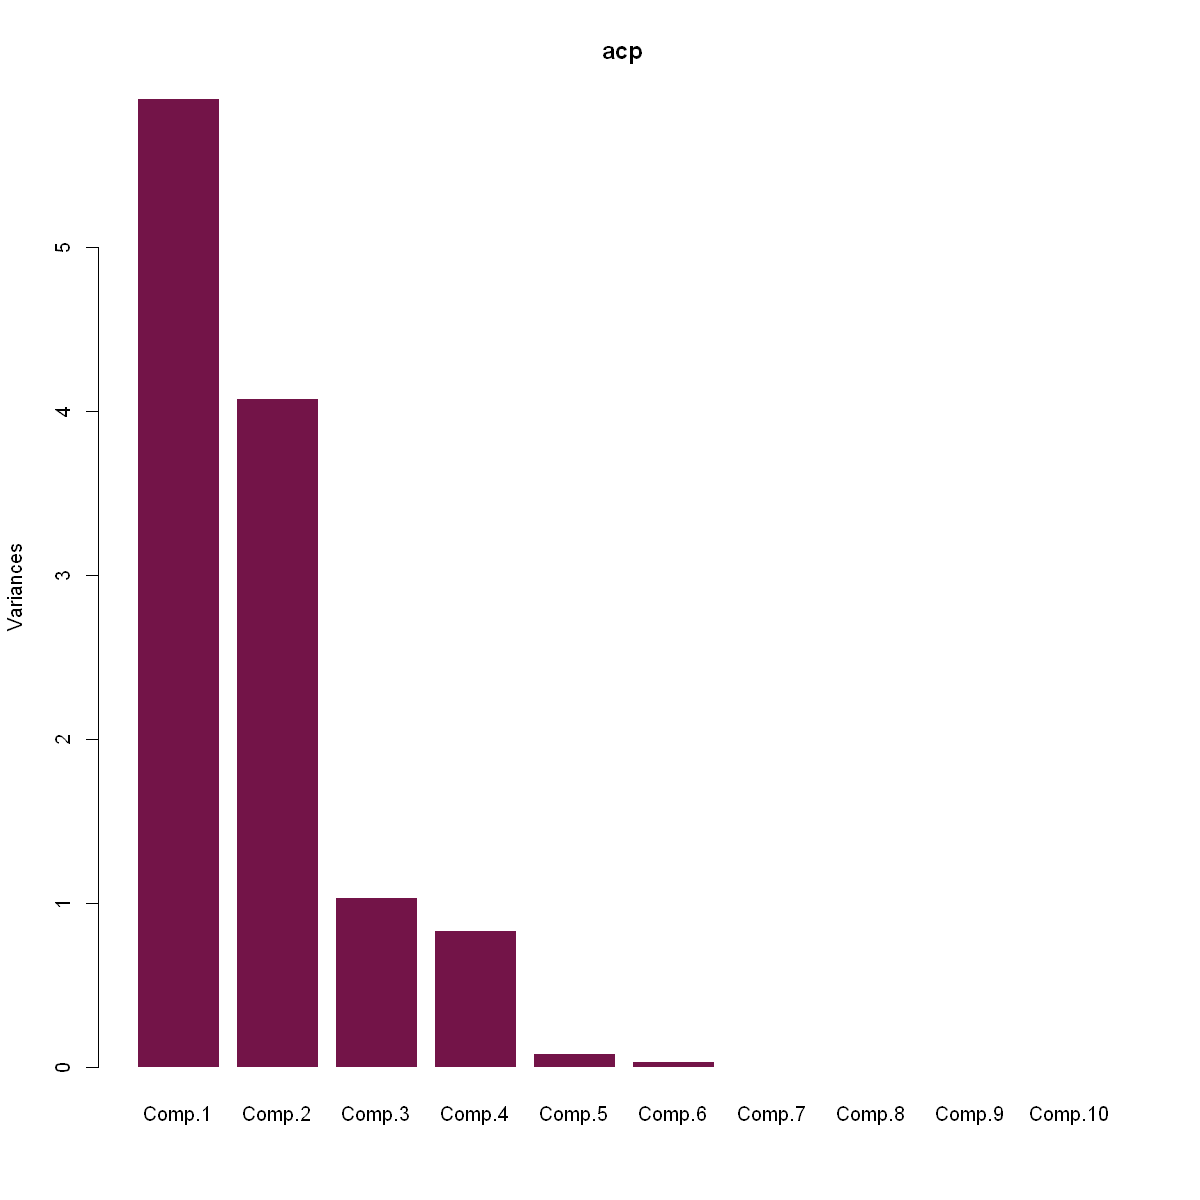

In [22]:
plot(acp,type="bar",col="#731448", border = FALSE)

In [23]:
print(round(acp$loadings[, 1:6],3))

                  Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6
Area               0.305  0.332  0.019  0.011  0.086  0.007
Perimeter          0.380  0.181  0.074 -0.034 -0.219 -0.093
Major_Axis_Length  0.409  0.040 -0.033 -0.040  0.005  0.310
Minor_Axis_Length  0.011  0.491  0.095  0.055 -0.046 -0.148
Convex_Area        0.305  0.331  0.038  0.006  0.090  0.010
Equiv_Diameter     0.304  0.333  0.018  0.010  0.084 -0.011
Eccentricity       0.312 -0.299 -0.107 -0.060  0.646 -0.493
Solidity           0.035  0.083 -0.928  0.277 -0.196 -0.121
Extent            -0.116  0.155 -0.268 -0.944 -0.014 -0.015
Roundness         -0.307  0.297 -0.156  0.113  0.650  0.512
Aspect_Ration      0.318 -0.303 -0.083 -0.073 -0.149  0.582
Compactness       -0.320  0.306  0.080  0.070 -0.166 -0.117


Nos quedamos con los componentes 1,2 y 3, ya que son los que aportan mas informacion respecto a la varianza analizada llegando a un 91,89%. En el componente 1, seleccionamos Maior_Axis_Lenght, Perimeter, Eccentricity, Convex_Area y Area. Roundenss y Compactness tambien informacion negaiva de la varianza. En el segundo componente, seleccionamos las variables Minor_Axis_Length, Area, Convex_Area, Equiv_Diameter y Compactness. La variable Aspect_Ration nos aporta informacion negativa respecto a la varianza. En el componente 3 seleccionaremos unicamente Extent.

#### <font color='#731448'>  2.3 ANOVA </font>

- $H_{0}$: No existen diferencias significativas entre las medias de los grupos
- $H_{1}$: Existen diferencian significativas entre las medias de los grupos

In [24]:
resultados_anova = data.frame(Variable = character(), F_Value = numeric(), P_Value = numeric(), row.names = NULL)
variables = names(sub_set)

for (variable in variables) {
  formula = as.formula(paste(variable, '~ Class2'))
  anova_result = aov(formula, data = data)
  
  # Extraer F value y p-value
  f_value = summary(anova_result)[[1]][['F value']][1]
  p_value = summary(anova_result)[[1]][['Pr(>F)']][1]
 resultados_anova = rbind(resultados_anova, data.frame(Variable = variable, F_Value = f_value, P_Value = p_value))
}

# Muestra los resultados de ANOVA
print(resultados_anova)

            Variable    F_Value       P_Value
1               Area   74.59327  1.013240e-17
2          Perimeter  443.63412  8.682216e-91
3  Major_Axis_Length 1149.96600 1.108998e-207
4  Minor_Axis_Length  479.67998  2.079533e-97
5        Convex_Area   72.57742  2.732434e-17
6     Equiv_Diameter   65.88394  7.425085e-16
7       Eccentricity 2390.90077  0.000000e+00
8           Solidity   38.16649  7.560815e-10
9             Extent  147.43488  5.263276e-33
10         Roundness 2029.40317  0.000000e+00
11     Aspect_Ration 2716.92322  0.000000e+00
12       Compactness 2795.02244  0.000000e+00


Todas las variables presentan diferencias significativas respecto a la difernecia de medias de nuestros variables categoricas.

### <font color='#731448'>  3. Modelo de regresion logistica </font>

Hemos evaluado mediante informacion cruzada, analisis de correlaciones, analisis de componentes principales y analisis de la varianza a traves del metodo de ANOVA todas nuestras variables, para deducir el modelo final que mayor capacidad predictiva tenga. Luego de este extenso analisis, que ya fue comentado particularmente debajo de cada uno, decidimos quedarnos unicamente con cuatro variables para realizar el modelo de regresion logistica. Estas variables son: Aspect_Ration, Compactness, Roundness y Major_Axis_Length . Quiero aclarar que hemos decidio descartar Eccentricity dado que tenia mucha correlacion con las variables seleccionadas y las otras variables no tenian correlaciones entre ellas, con lo cual esto nos disminuye la probabilidad de entrar en errores de multicolinealidad alta. Igualmente, vamos a plantear la capacidad predictiva del modelo segun distintas combinaciones de variable, siempre basandonos en los analsiis previos. Tal como planteamos anteriormente, evaluaremos dejar la variable Eccentricity en lugar de sus otras correladas, y veremos que tal ajusta el modelo.

In [25]:
data_modelo = subset(data, select = c(Class2, Compactness, Perimeter, Minor_Axis_Length))

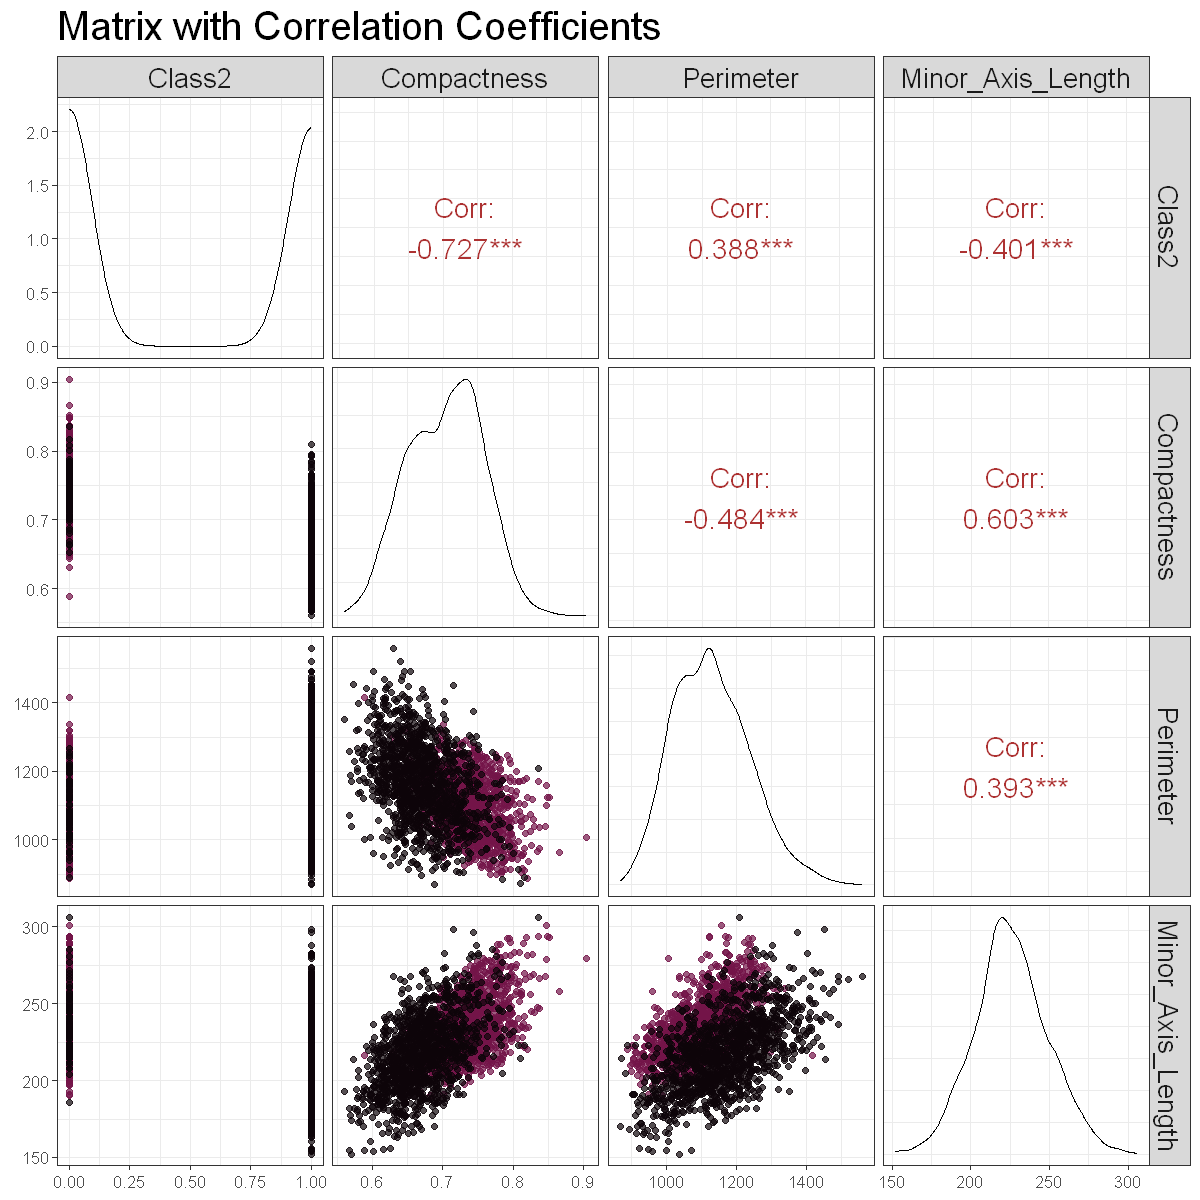

In [26]:
options(repr.plot.width = 10,  repr.plot.height = 10  )

clase_1 = sum(data_modelo$Class2 == 1)
clase_0 = sum(data_modelo$Class2 == 0)
colores = c(rep('#731448',clase_1), rep('#0D0409',clase_0))

ggpairs(
  data_modelo,
  title = "Matrix with Correlation Coefficients",
  lower = list(continuous = wrap("points", alpha = 0.7, color = colores)),
  upper = list(continuous = wrap("cor", size = 6, color ='#ad3232'))) +
theme_bw() +
theme(
  text = element_text(size = 20), 
  axis.text = element_text(size = 10),
  axis.title = element_text(size = 10)
)

##### <font color='#731448'>  Modelo 2 </font>

En este modelo vamos a incorporar todas las variables que hayan sido fructiferas de todos los analisis salvo el de correlacion entre variables independientes.

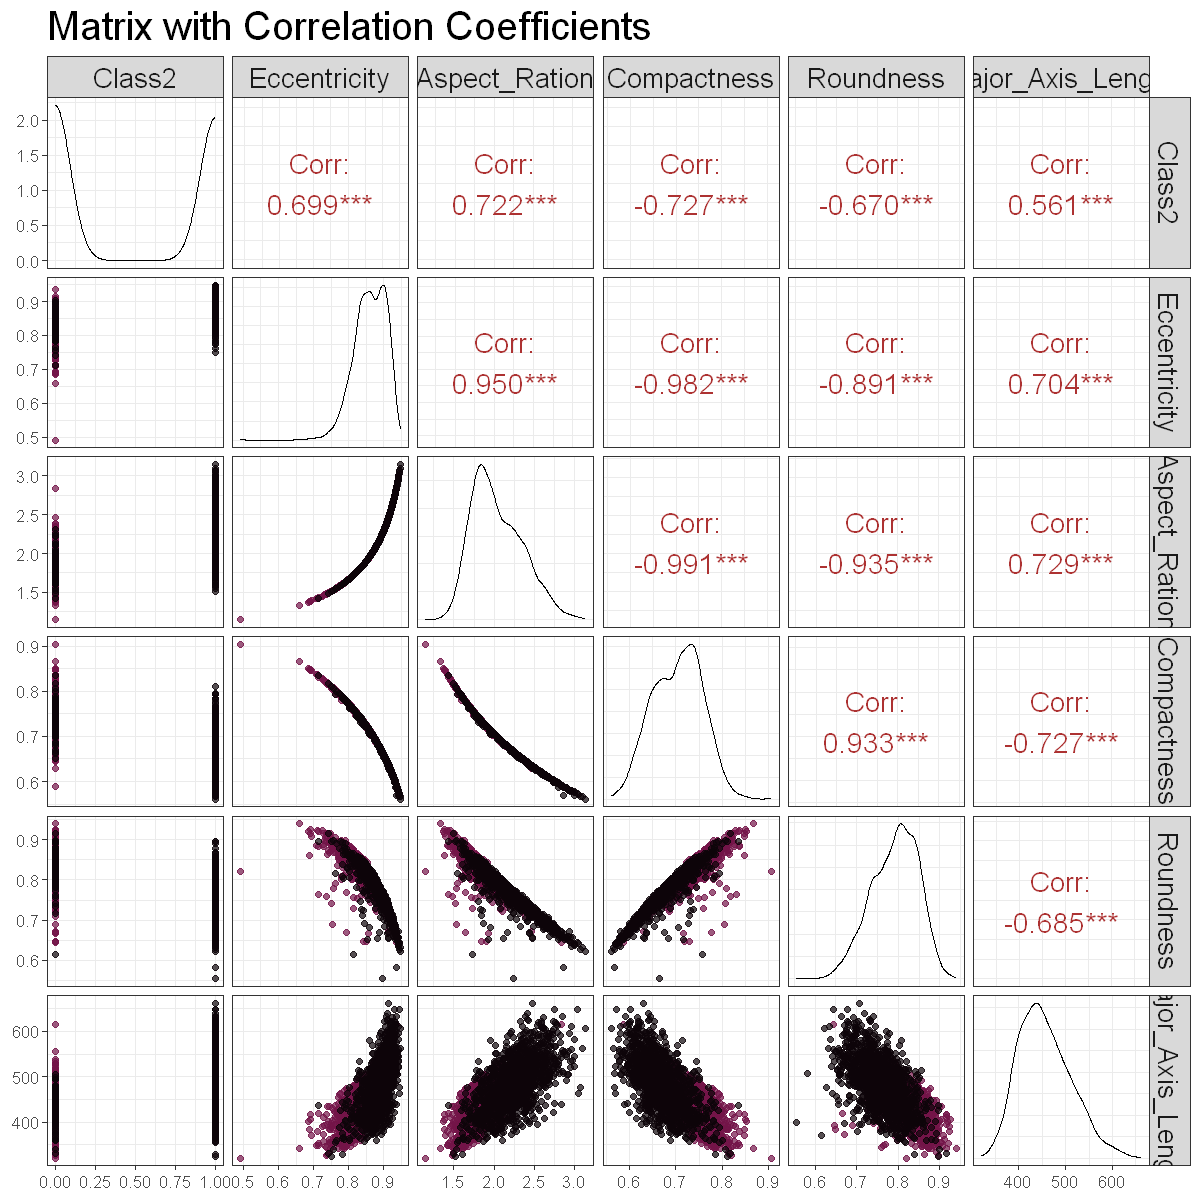

In [27]:
data_modelo2 = subset(data, select= c(Class2, Eccentricity, Aspect_Ration, Compactness, Roundness, Major_Axis_Length))
options(repr.plot.width = 10,  repr.plot.height = 10  )

clase_1 = sum(data_modelo2$Class2 == 1)
clase_0 = sum(data_modelo2$Class2 == 0)
colores = c(rep('#731448',clase_1), rep('#0D0409',clase_0))

ggpairs(
  data_modelo2,
  title = "Matrix with Correlation Coefficients",
  lower = list(continuous = wrap("points", alpha = 0.7, color = colores)),
  upper = list(continuous = wrap("cor", size = 6, color ='#ad3232'))) +
theme_bw() +
theme(
  text = element_text(size = 20), 
  axis.text = element_text(size = 10),
  axis.title = element_text(size = 10)
)

#### <font color='#731448'>  3.1 Train </font>

Hagamos la separacion de nuestro data set para poder entrenarlo y luego testear nuestra prediccion de nuestra regresion logistica.

In [28]:
set.seed(33)
inTrain = createDataPartition(y = data$Class2
                                  , p = .80
                                  , list = FALSE
                                  , times = 1)
data.train = data[inTrain,]
data.test = data[-inTrain,]

ytrain = data$Class2[inTrain]
ytest = data$Class2[-inTrain]

##### <font color='#731448'>  3.1.1 Modelo 1 </font>

In [29]:
### Generamos un primer modelo con las variables consideradas importantes por los diferentes análisis
mrl1 = glm(formula = Class2 ~ Compactness + Perimeter + Minor_Axis_Length
          , data = data.train
          , family = "binomial")
summary(mrl1)


Call:
glm(formula = Class2 ~ Compactness + Perimeter + Minor_Axis_Length, 
    family = "binomial", data = data.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.3951  -0.4770  -0.0658   0.4216   3.5204  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)        64.000404   9.408215   6.803 1.03e-11 ***
Compactness       -94.081050  13.510511  -6.964 3.32e-12 ***
Perimeter          -0.014548   0.005549  -2.622  0.00874 ** 
Minor_Axis_Length   0.081877   0.028226   2.901  0.00372 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2768.2  on 1999  degrees of freedom
Residual deviance: 1320.3  on 1996  degrees of freedom
AIC: 1328.3

Number of Fisher Scoring iterations: 6


Todas las variables incluidas son significativas.

In [30]:
### Generamos las predicciones de nuestro modelo
mrl1_prob = predict(mrl1, type = 'response')
head(mrl1_prob)

1            2            3            4            6            7 
0.0003029804 0.0573534070 0.5832669854 0.0190952446 0.0487996083 0.0099839043

In [31]:
### Vemos la predicción para cada instancia
mrl1_pred = ifelse(mrl1_prob > 0.5, 1, 0)
head(mrl1_pred)

1 2 3 4 6 7 
0 0 1 0 0 0

In [32]:
confusionMatrix(as.factor(mrl1_pred), as.factor(data.train$Class2))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 923 147
         1 124 806
                                          
               Accuracy : 0.8645          
                 95% CI : (0.8487, 0.8792)
    No Information Rate : 0.5235          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7281          
                                          
 Mcnemar's Test P-Value : 0.1814          
                                          
            Sensitivity : 0.8816          
            Specificity : 0.8458          
         Pos Pred Value : 0.8626          
         Neg Pred Value : 0.8667          
             Prevalence : 0.5235          
         Detection Rate : 0.4615          
   Detection Prevalence : 0.5350          
      Balanced Accuracy : 0.8637          
                                          
       'Positive' Class : 0               
                              

##### <font color='#731448'>  3.1.2 Modelo 2 </font>

In [33]:
### Generamos un primer modelo con las variables consideradas importantes por los diferentes análisis
mrl2 = glm(formula = Class2 ~ Eccentricity + Aspect_Ration + Compactness + Roundness + Major_Axis_Length
          , data = data.train
          , family = "binomial")
summary(mrl2)


Call:
glm(formula = Class2 ~ Eccentricity + Aspect_Ration + Compactness + 
    Roundness + Major_Axis_Length, family = "binomial", data = data.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.0633  -0.4752  -0.1882   0.3601   2.8751  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)        3.253e+02  7.847e+01   4.145 3.39e-05 ***
Eccentricity      -1.498e+02  3.082e+01  -4.859 1.18e-06 ***
Aspect_Ration     -1.205e+01  6.290e+00  -1.916 0.055396 .  
Compactness       -2.654e+02  6.129e+01  -4.330 1.49e-05 ***
Roundness          1.670e+01  4.792e+00   3.484 0.000493 ***
Major_Axis_Length  4.468e-03  1.914e-03   2.335 0.019564 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2768.2  on 1999  degrees of freedom
Residual deviance: 1298.9  on 1994  degrees of freedom
AIC: 1310.9

Number of Fisher Scoring iterations: 6


Aqui notamos que las variables ASpect_Ration no es significativa, con lo cual procedemos a quitarla del modelo y continuamos con el analisis:

In [34]:
### Generamos un primer modelo con las variables consideradas importantes por los diferentes análisis
mrl2 = glm(formula = Class2 ~ Eccentricity + Compactness + Roundness + Major_Axis_Length
          , data = data.train
          , family = "binomial")
summary(mrl2)


Call:
glm(formula = Class2 ~ Eccentricity + Compactness + Roundness + 
    Major_Axis_Length, family = "binomial", data = data.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.2744  -0.4842  -0.2066   0.3533   2.8461  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)        1.853e+02  2.868e+01   6.460 1.05e-10 ***
Eccentricity      -1.029e+02  1.926e+01  -5.342 9.18e-08 ***
Compactness       -1.541e+02  1.874e+01  -8.224  < 2e-16 ***
Roundness          1.293e+01  4.226e+00   3.060  0.00221 ** 
Major_Axis_Length  4.076e-03  1.905e-03   2.140  0.03239 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2768.2  on 1999  degrees of freedom
Residual deviance: 1302.5  on 1995  degrees of freedom
AIC: 1312.5

Number of Fisher Scoring iterations: 6


In [35]:
### Generamos las predicciones de nuestro modelo
mrl2_prob = predict(mrl2, type = 'response')
head(mrl2_prob)

1          2          3          4          6          7 
0.01542576 0.06798085 0.54669813 0.03730140 0.07346174 0.03288053

In [36]:
### Vemos la predicción para cada instancia
mrl2_pred = ifelse(mrl2_prob > 0.5, 1, 0)
head(mrl2_pred)

1 2 3 4 6 7 
0 0 1 0 0 0

In [37]:
confusionMatrix(as.factor(mrl2_pred), as.factor(data.train$Class2))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 942 165
         1 105 788
                                          
               Accuracy : 0.865           
                 95% CI : (0.8492, 0.8797)
    No Information Rate : 0.5235          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7286          
                                          
 Mcnemar's Test P-Value : 0.0003299       
                                          
            Sensitivity : 0.8997          
            Specificity : 0.8269          
         Pos Pred Value : 0.8509          
         Neg Pred Value : 0.8824          
             Prevalence : 0.5235          
         Detection Rate : 0.4710          
   Detection Prevalence : 0.5535          
      Balanced Accuracy : 0.8633          
                                          
       'Positive' Class : 0               
                              

#### <font color='#731448'>  3.2 Test </font>

In [38]:
pred_mrl1= predict(mrl1,newdata = data.test, type="response")
mrl1_pred = ifelse(pred_mrl1 > 0.5, 1, 0)
confusionMatrix(as.factor(mrl1_pred), as.factor(data.test$Class2))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 233  34
         1  20 213
                                          
               Accuracy : 0.892           
                 95% CI : (0.8614, 0.9178)
    No Information Rate : 0.506           
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.7838          
                                          
 Mcnemar's Test P-Value : 0.07688         
                                          
            Sensitivity : 0.9209          
            Specificity : 0.8623          
         Pos Pred Value : 0.8727          
         Neg Pred Value : 0.9142          
             Prevalence : 0.5060          
         Detection Rate : 0.4660          
   Detection Prevalence : 0.5340          
      Balanced Accuracy : 0.8916          
                                          
       'Positive' Class : 0               
                              

In [39]:
pred_mrl2= predict(mrl2,newdata = data.test, type="response")
mrl2_pred = ifelse(pred_mrl2 > 0.5, 1, 0)
confusionMatrix(as.factor(mrl2_pred), as.factor(data.test$Class2))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 234  37
         1  19 210
                                         
               Accuracy : 0.888          
                 95% CI : (0.857, 0.9143)
    No Information Rate : 0.506          
    P-Value [Acc > NIR] : <2e-16         
                                         
                  Kappa : 0.7758         
                                         
 Mcnemar's Test P-Value : 0.0231         
                                         
            Sensitivity : 0.9249         
            Specificity : 0.8502         
         Pos Pred Value : 0.8635         
         Neg Pred Value : 0.9170         
             Prevalence : 0.5060         
         Detection Rate : 0.4680         
   Detection Prevalence : 0.5420         
      Balanced Accuracy : 0.8876         
                                         
       'Positive' Class : 0              
                                         

### <font color='#731448'>  4. Conclusion </font>

Hemos realizado un procedo de evaluacion estadistica para obtener un modelo de regresion logistica capaz de predecir la clase de semilla a la que pertenece una calabaza tomando distintas medidas. Tenemos una base de datos con 2500 observaciones, donde el 52% corresponden a la clase 0 y el 48% corresponde a la clase 1. Nuestra base de datos cuenta con variables que tienen distribuciones normales y en su mayoria simetricas. Hemos realizado evaluaciones de informacion mutua, de correlacion, de significatividad en modelos estadisticos univariados, analisis de correlaciones entre variables independientes, analisis de componentes principales y un analisis de la varianza con el metodo ANOVA. Luego de todo este profundo analsiis, hemos evaluado a nivel general que nos daba cada apartado, hemos decidido involucrar dos escenarios posibles en funcion de evaluar la capacidad predictiva de cada variable independiente para ver que variabilidad teniamos en los terminos de eficiencia de prediccion. Como ya explicamos anteriormente, en el primer modelo incluimos 3 variables que presentaban buenos resultados en el test de informacion mutua como asi tambien en el test de correlaciones con la variable dependiente y correlaciones entre la variable independiente. En el modelo dos, hemos seleccionado variables que tenian buenos resultados en el analisis de informacion mutua y buenos resultados en el analisis de correlaciones con la variable independiente, pero que sin embargo presentaban cierto grado de correlacion entre ellas. El analisis ANOVA no ha dado que todas las variables eran estadisticamente significativas a la hora de evaluar la diferencia de medias entre las clases, con lo cual no fue muy relevante a la hora de aportar conclusiones. Quisimos evaluar la diferencia que habia en resultados en dos modelos distintos, siendo menos obvediente a la correlacion lineal existente entre las variables independientes en el segundo modelo planteado. Es por ello que nos hemos quedado con dos modelos finales que aportan buenos resultados para predecir la clase de semilla a la que corresponde una calabaza, de hecho ambos dos nos dan resultados muy parejos. El modelo 1 tiene un accuracy de 89,2% respecto a un 88,8% del modelo 2. El modelo 1 tiene una especificidad de 86,23% (verdaderos negativos) contra un 85,02% del modelo 2. Sin embargo, el modelo 2 tiene algo mas de precision en acertar positivos, ya que su sensibilidad es del 92,49% contra un 92,09% del modelo 1. En general, ambos modelos nos dan muy buenos resultados, dado el balance de los 3 parametros, creo que eligira el modelo 1, ya que tiene un mejor accuracy y especificidad, mas alla de perder un poco en sensibilidad. Ademas hay que tener en cuenta dos cosas. La primera, es que tiene un fundamento estadistico mas solido, ya que se elijen variables independientes que tienen una baja correlacion entre ellas, lo que aporta mayor precision de los estimadores. Quizas esto este reflejado en sus resultados. La segunda, es que es un modelo mas parsimonioso, tiene mayor poder explicativo con menor cantidad de variables. Entonces, como conclsuion, nos quedamos con el primer modelo.